# CDC Diabetes Health Indicators

## Problem Statement
Diabetes is a growing health concern worldwide, with significant implications for public health systems. In Kenya, the prevalence of diabetes is increasing, particularly in urban areas. There is a need to understand the relationship between lifestyle factors and diabetes to develop effective interventions. This project aims to analyze the CDC Diabetes Health Indicators Dataset to identify key risk factors for diabetes and provide actionable insights to improve diabetes care and prevention in Kenya.

## Business Understanding
The primary objective of this project is to better understand the relationship between lifestyle and diabetes in the US using the CDC Diabetes Health Indicators Dataset. This topic is of particular interest due to the rising prevalence of diabetes in Kenya, especially in urban areas. By studying this data, we aim to create awareness about diabetes and develop interventions to reduce the prevalence of risk factors for kidney failure and improve diabetes care in Kenya. This project applies to the Health and Medicine domain and targets the Ministry of Health, teaching institutions, Non-Governmental Organizations, the private sector, and teaching hospitals in Kenya. If successful, this analysis could significantly impact by raising awareness and guiding interventions to improve diabetes care and reduce related health risks.

## Data Understanding and Cleaning
We will collect data on diabetes diagnosis, demographics (race, sex), personal information (income, education), and health history (drinking, smoking, mental health, physical health). The raw data is sourced from [Kaggle's Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) and is available for download and public use. The features include integer and binary variables, and the dataset does not contain missing values. We will handle data preprocessing tasks such as encoding categorical variables and scaling numerical features while addressing data privacy and managing any inconsistent data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\DANIEL\Desktop\CAPSTONE PROJECT\DATA\diabetes data capstone\diabetes_capstone.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
 0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

In [2]:
# DATA CLEANING
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
duplicate_rows

23899

The data contains duplicate entries which, we have chosen not to remove since doing so could skew the dataset's distribution or fail to account for variations that are necessary for model robustness.

In [3]:
pd.set_option('display.max_columns', None)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


The dataset now has 229,781 rows and 22 columns after removing duplicates. All columns are of type float64, which is appropriate for the numerical variables in this dataset.

In [5]:
#Change the name of 'diabetes_012' column to "Diabetes_binary" since it indicates whether a person has diabetes (1) or not (0).
data = data.rename(columns={'Diabetes_012': 'Diabetes_binary'})
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


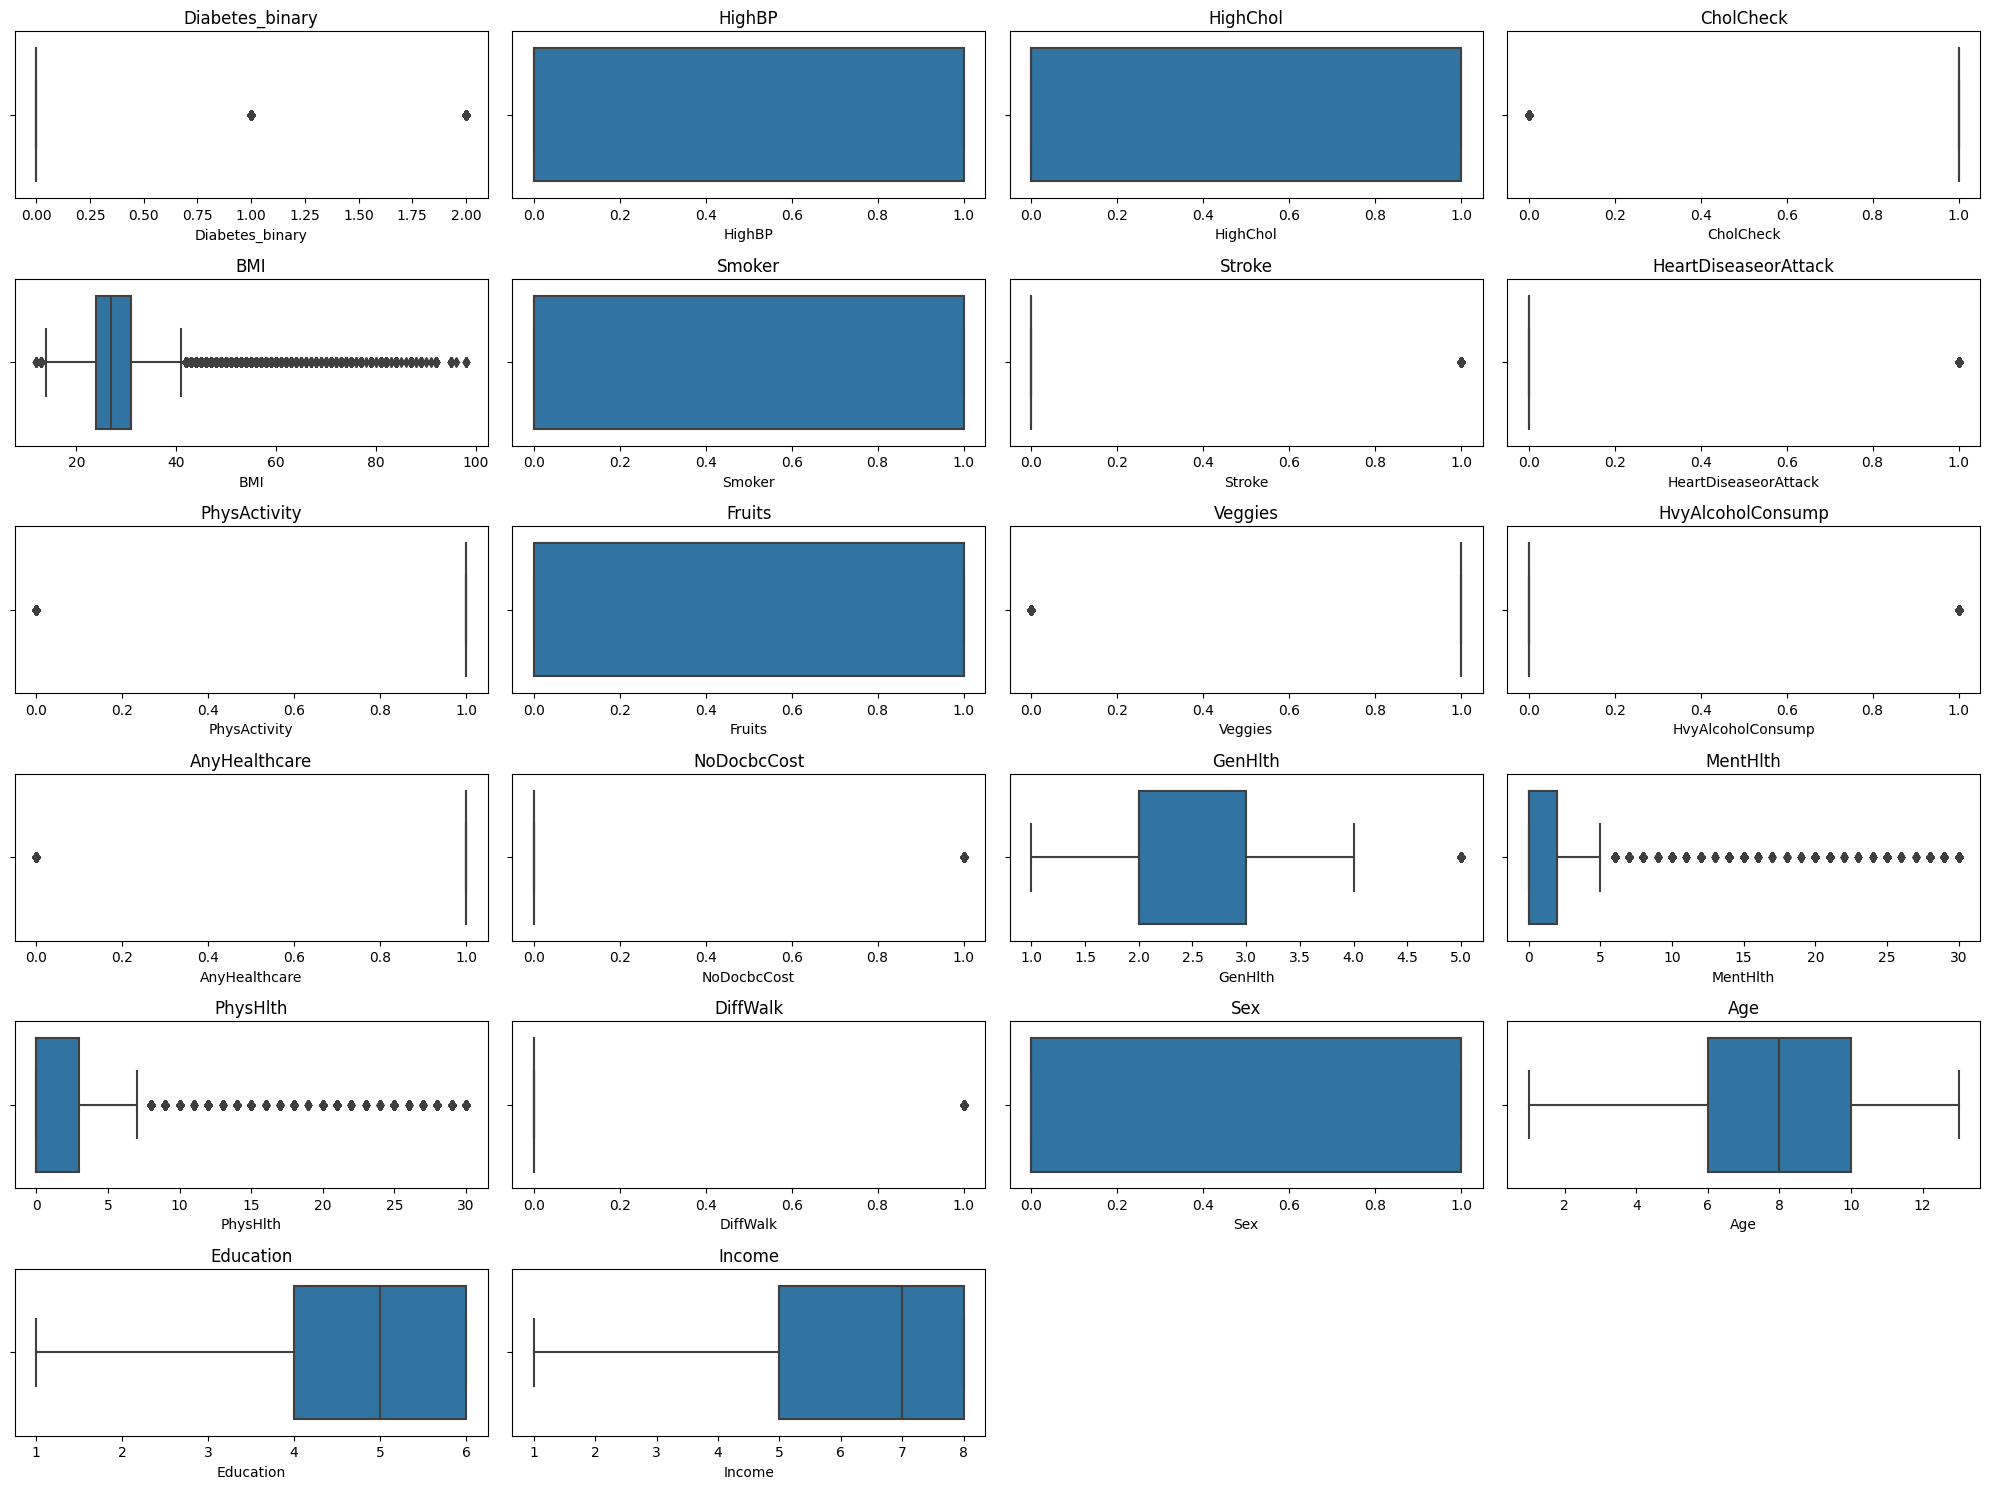

In [6]:
#Identifying Outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns):
    plt.subplot(6, 4, i+1)
    sns.boxplot(x=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [7]:
## HANDLING OUTLIERS

# Function to handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Handle outliers for the identified variables
outlier_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']
for col in outlier_columns:
    data = handle_outliers(data, col)

data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000
mean,0.219601,0.377516,0.386960,0.959812,27.271639,0.407120,0.024994,0.065225,0.813156,0.655826,0.829146,0.057257,0.955882,0.050278,2.157426,0.458085,0.206577,0.067045,0.470452,8.006714,5.148464,6.422007
std,0.613166,0.484767,0.487056,0.196401,4.747831,0.491299,0.156108,0.246922,0.389788,0.475100,0.376383,0.232333,0.205358,0.218518,0.847743,1.164923,0.557544,0.250100,0.499128,3.072253,0.946940,1.858325
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,30.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,2.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,165919.0,0.219601,0.613166,0.0,0.0,0.0,0.0,2.0
HighBP,165919.0,0.377516,0.484767,0.0,0.0,0.0,1.0,1.0
HighChol,165919.0,0.386960,0.487056,0.0,0.0,0.0,1.0,1.0
CholCheck,165919.0,0.959812,0.196401,0.0,1.0,1.0,1.0,1.0
BMI,165919.0,27.271639,4.747831,14.0,24.0,27.0,30.0,41.0
Smoker,165919.0,0.407120,0.491299,0.0,0.0,0.0,1.0,1.0
Stroke,165919.0,0.024994,0.156108,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,165919.0,0.065225,0.246922,0.0,0.0,0.0,0.0,1.0
PhysActivity,165919.0,0.813156,0.389788,0.0,1.0,1.0,1.0,1.0
Fruits,165919.0,0.655826,0.475100,0.0,0.0,1.0,1.0,1.0


In [9]:
diabetes_distribution = data['Diabetes_binary'].value_counts()

diabetes_distribution

0.0    146456
2.0     16973
1.0      2490
Name: Diabetes_binary, dtype: int64

This distribution indicates that the dataset is imbalanced, with a significantly larger proportion of non-diabetic individuals compared to prediabetic and diabetic ones.

No Diabetes (0): 146,456 occurrences (85.11%)

Pre-diabetic (1) and Diabetic (2): 19,463 occurrences (14.89%)

The categories Pre-diabetic (1) and Diabetic (2) together make up a smaller portion of the dataset compared to those with no diabetes. This imbalance needs to be taken into consideration when developing predictive models, as it can affect model performance.

### Variables Table

This dataset is from the UCI Machine Learning Repository and contains health indicators related to diabetes, collected through a questionnaire given to participants. Below is a detailed description of the data:

| Variable Name          | Role    | Type     | Description                                                                                                             | Units      | Missing Values |
|------------------------|---------|----------|------------------------------------------------------------------------------------------------------------------------|------------|----------------|
| **ID**                 | ID      | Integer  | Patient ID                                                                                                             | -          | no             |
| **Diabetes_binary**    | Target  | Binary   | 0 = no diabetes, 1 = prediabetes or diabetes                                                                           | -          | no             |
| **HighBP**             | Feature | Binary   | 0 = no high BP, 1 = high BP                                                                                            | -          | no             |
| **HighChol**           | Feature | Binary   | 0 = no high cholesterol, 1 = high cholesterol                                                                          | -          | no             |
| **CholCheck**          | Feature | Binary   | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                                              | -          | no             |
| **BMI**                | Feature | Integer  | Body Mass Index                                                                                                        | -          | no             |
| **Smoker**             | Feature | Binary   | Have you smoked at least 100 cigarettes in your entire life? (5 packs = 100 cigarettes) 0 = no, 1 = yes                | -          | no             |
| **Stroke**             | Feature | Binary   | (Ever told) you had a stroke. 0 = no, 1 = yes                                                                          | -          | no             |
| **HeartDiseaseorAttack** | Feature | Binary | Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no, 1 = yes                                            | -          | no             |
| **PhysActivity**       | Feature | Binary   | Physical activity in past 30 days - not including job. 0 = no, 1 = yes                                                 | -          | no             |
| **Fruits**             | Feature | Binary   | Consume fruit 1 or more times per day. 0 = no, 1 = yes                                                                 | -          | no             |
| **Veggies**            | Feature | Binary   | Consume vegetables 1 or more times per day. 0 = no, 1 = yes                                                            | -          | no             |
| **HvyAlcoholConsump**  | Feature | Binary   | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week). 0 = no, 1 = yes | -    | no             |
| **AnyHealthcare**      | Feature | Binary   | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes     | -          | no             |
| **NoDocbcCost**        | Feature | Binary   | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes  | -          | no             |
| **GenHlth**            | Feature | Integer  | Would you say that in general your health is: scale 1-5 (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor)   | -          | no             |
| **MentHlth**           | Feature | Integer  | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days | -          | no             |
| **PhysHlth**           | Feature | Integer  | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days | -          | no             |
| **DiffWalk**           | Feature | Binary   | Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes                                             | -          | no             |
| **Sex**                | Feature | Binary   | Sex. 0 = female, 1 = male                                                                                              | -          | no             |
| **Age**                | Feature | Integer  | Age (13-level age category, see codebook). 1 = 18-24, 9 = 60-64, 13 = 80 or older                                      | -          | no             |
| **Education**          | Feature | Integer  | Education level (EDUCA, see codebook). Scale 1-6 (1 = Never attended school or only kindergarten, 2 = Grades 1 through 8, 3 = Grades 9 through 11, 4 = Grade 12 or GED, 5 = College 1-3 years, 6 = College 4+ years) | -          | no             |
| **Income**             | Feature | Integer  | Income scale (INCOME2, see codebook). Scale 1-8 (1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more)    | -          | no             |

---

### Key Variables
1. **BMI (Body Mass Index)**:
   - **Importance**: A well-known risk factor for diabetes, higher BMI indicates overweight or obesity, which is strongly associated with diabetes.

2. **HighBP (High Blood Pressure)**:
   - **Importance**: High blood pressure is often found in individuals with diabetes and can be a significant predictor.

3. **HighChol (High Cholesterol)**:
   - **Importance**: High cholesterol levels are another risk factor for diabetes and related cardiovascular diseases.

4. **PhysActivity (Physical Activity)**:
   - **Importance**: Regular physical activity is known to reduce the risk of diabetes. Lack of physical activity can be a significant risk factor.

5. **Smoker**:
   - **Importance**: Smoking is associated with various health issues, including increased risk of diabetes.

6. **GenHlth (General Health)**:
   - **Importance**: General health status can provide insights into overall health and well-being, which can be correlated with diabetes risk.

7. **MentHlth (Mental Health)**:
   - **Importance**: Mental health issues can indirectly affect diabetes risk through lifestyle choices and stress-related factors.

8. **PhysHlth (Physical Health)**:
   - **Importance**: Similar to general health, physical health status can indicate the presence of other conditions that may influence diabetes risk.

9. **Age**:
   - **Importance**: Age is a non-modifiable risk factor for diabetes, with prevalence increasing with age.

10. **Sex**:
    - **Importance**: Understanding differences in diabetes prevalence and risk between males and females can be crucial for targeted interventions.

11. **Education**:
    - **Importance**: Education level can influence health literacy and lifestyle choices, impacting diabetes risk.

12. **Income**:
    - **Importance**: Income level can affect access to healthcare, healthy food options, and overall lifestyle, impacting diabetes risk.


## Exploratory Data Analysis

### Univariate Analysis

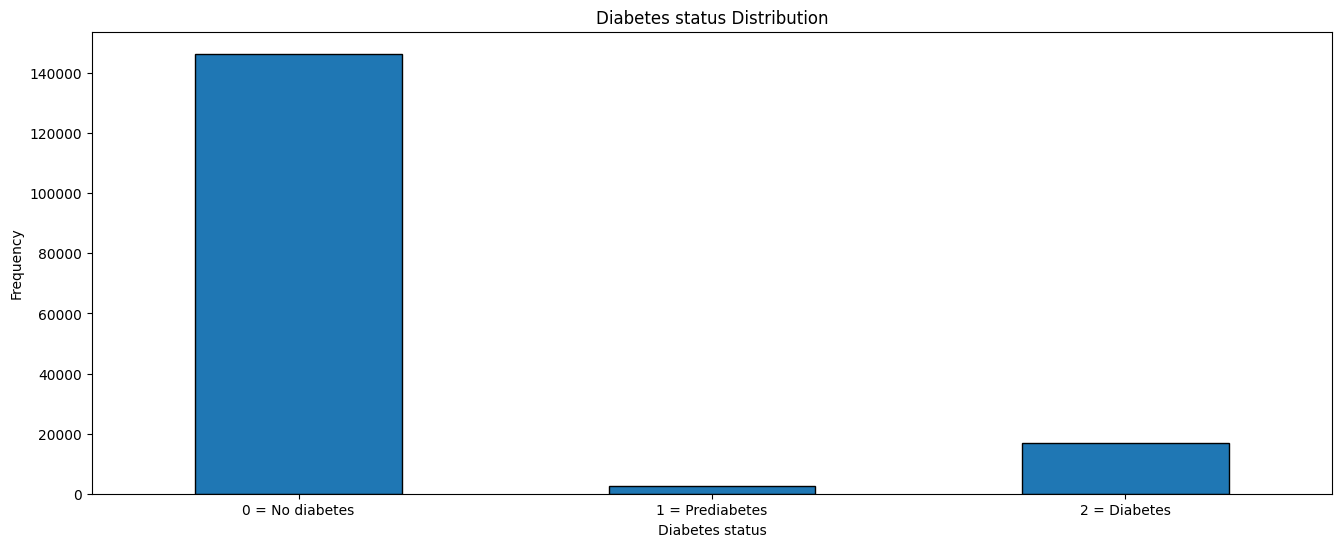

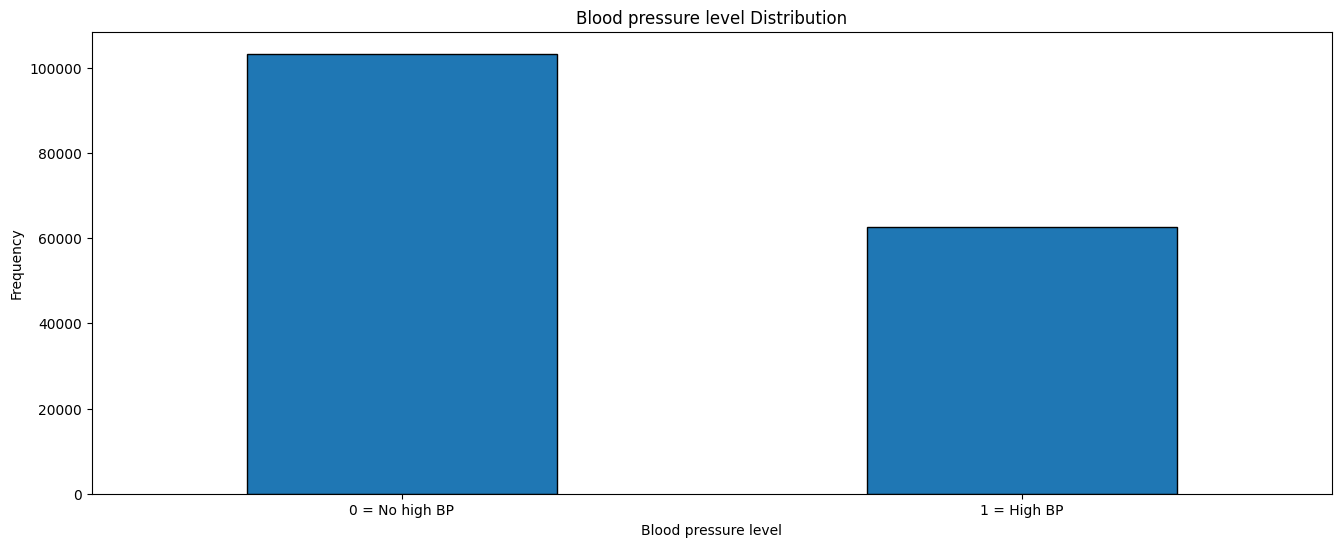

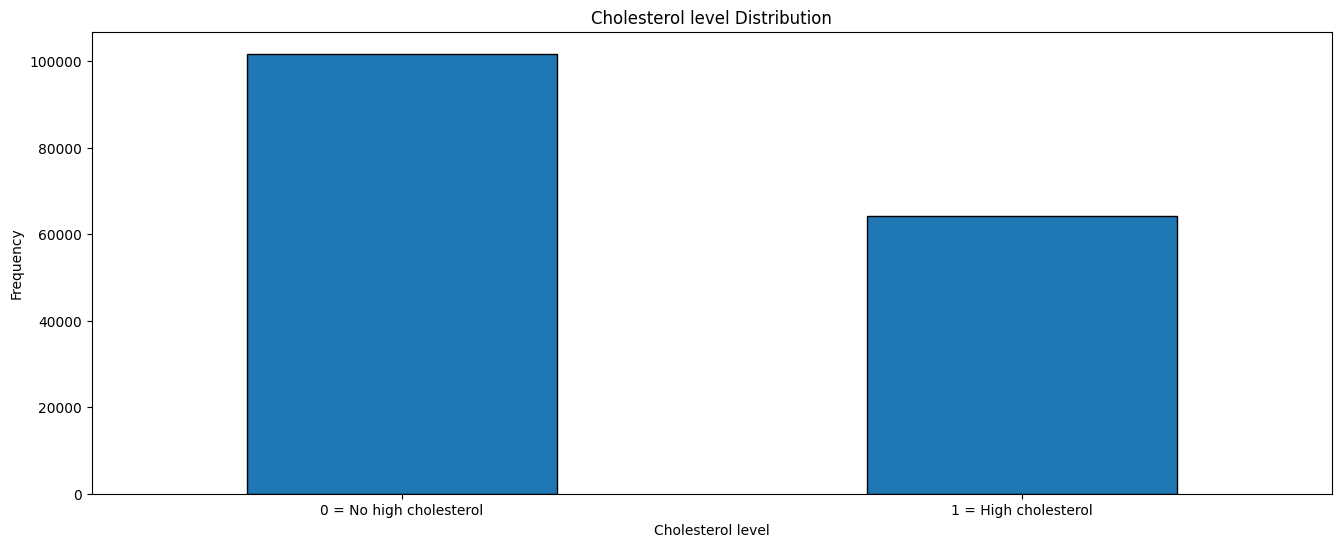

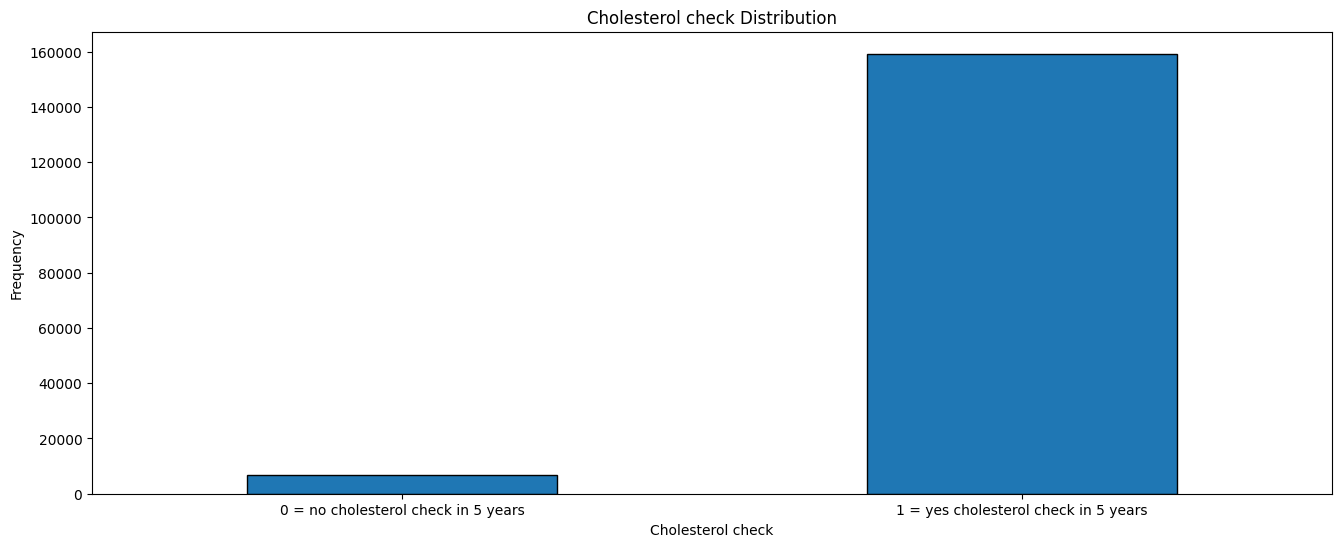

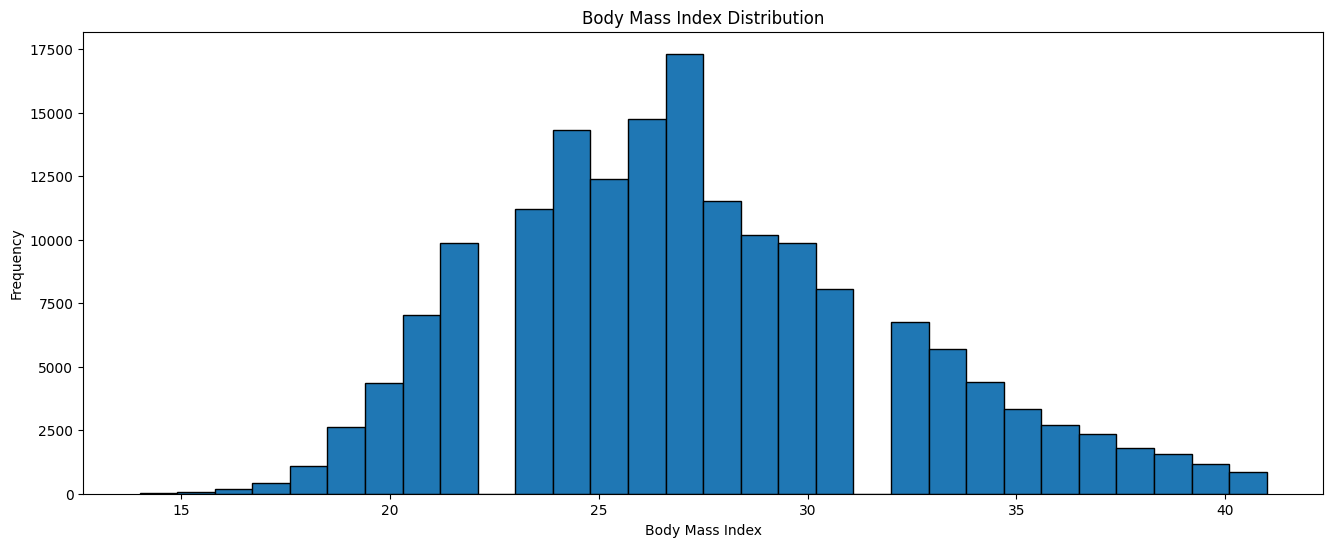

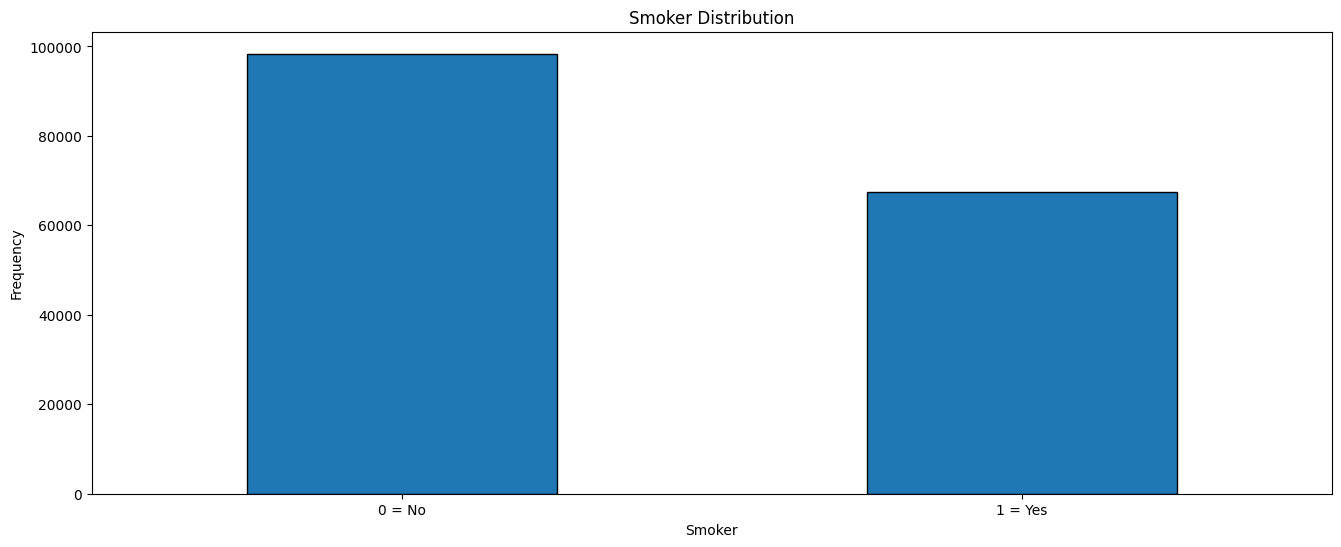

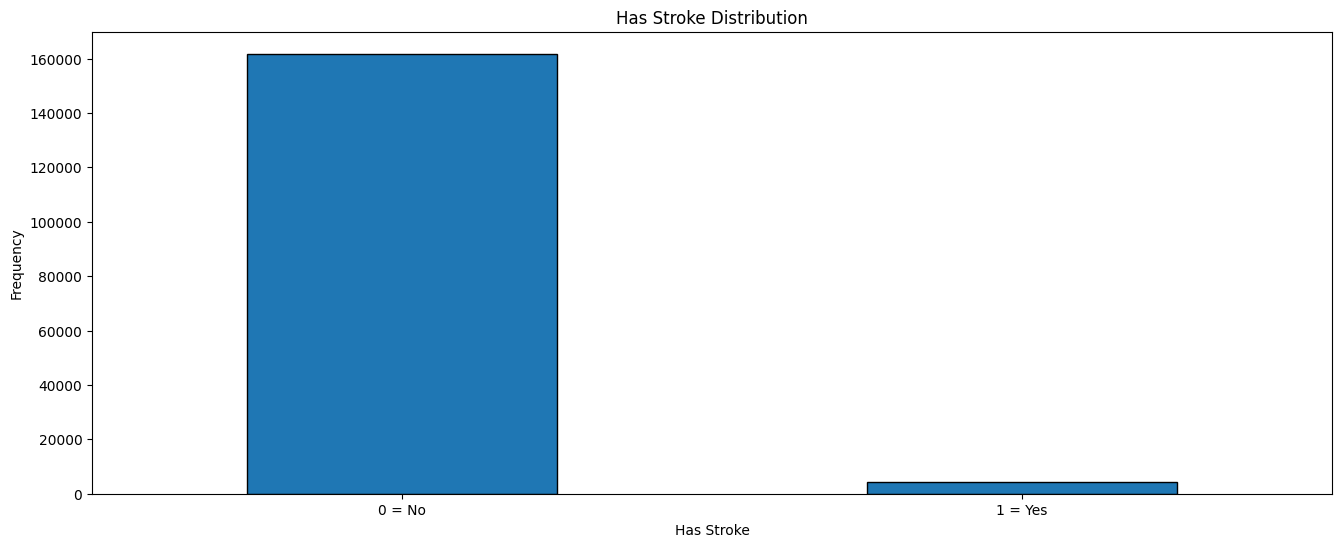

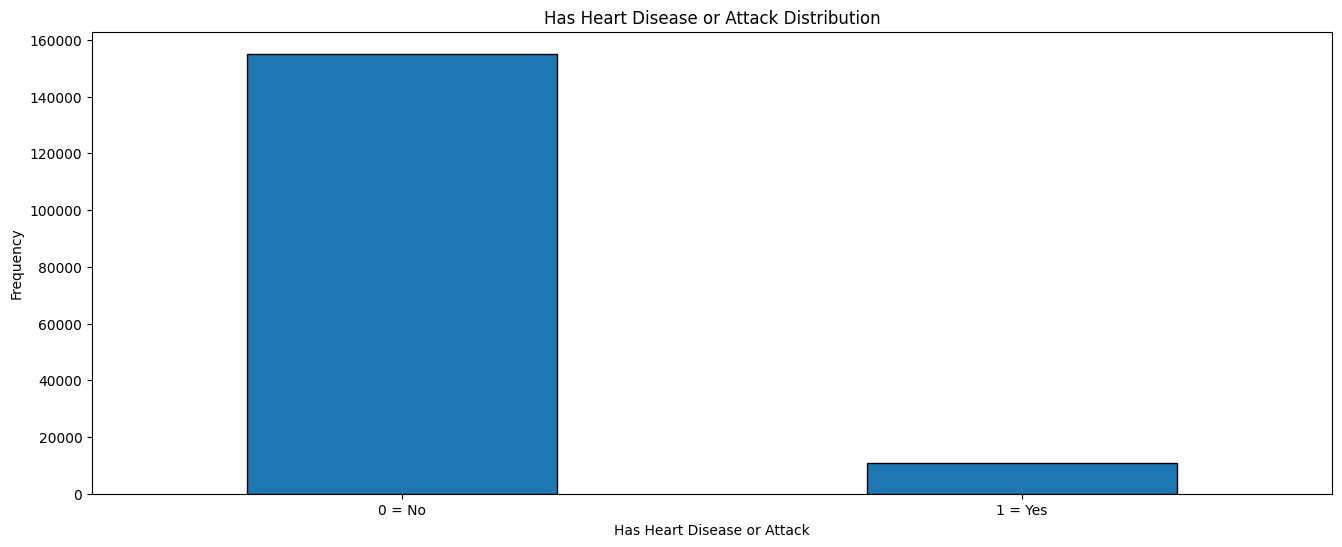

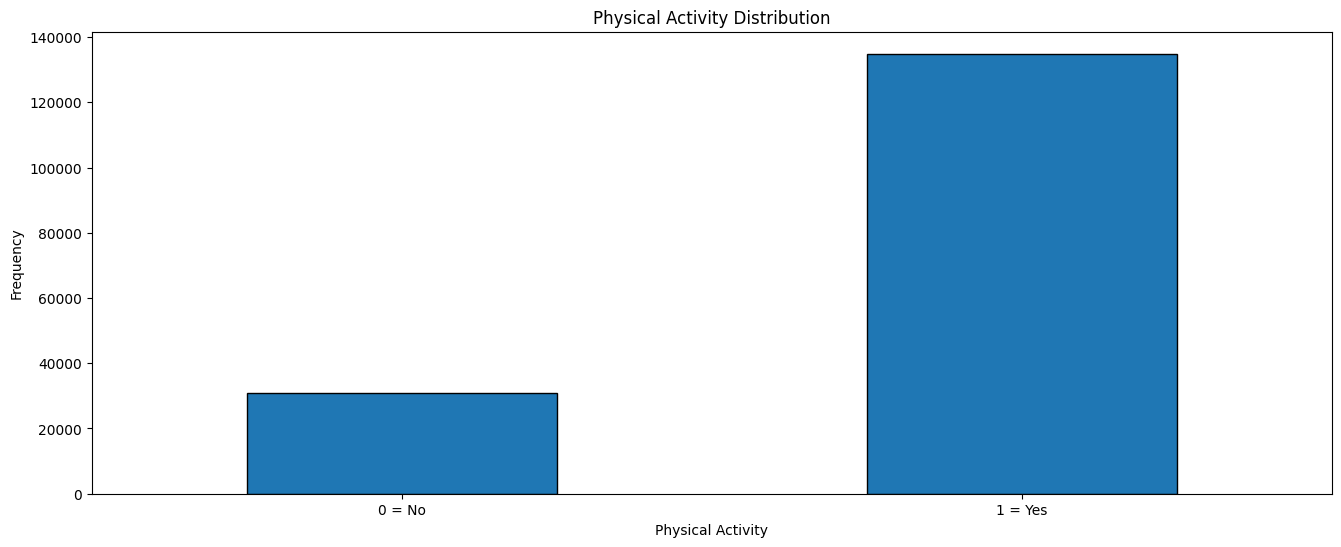

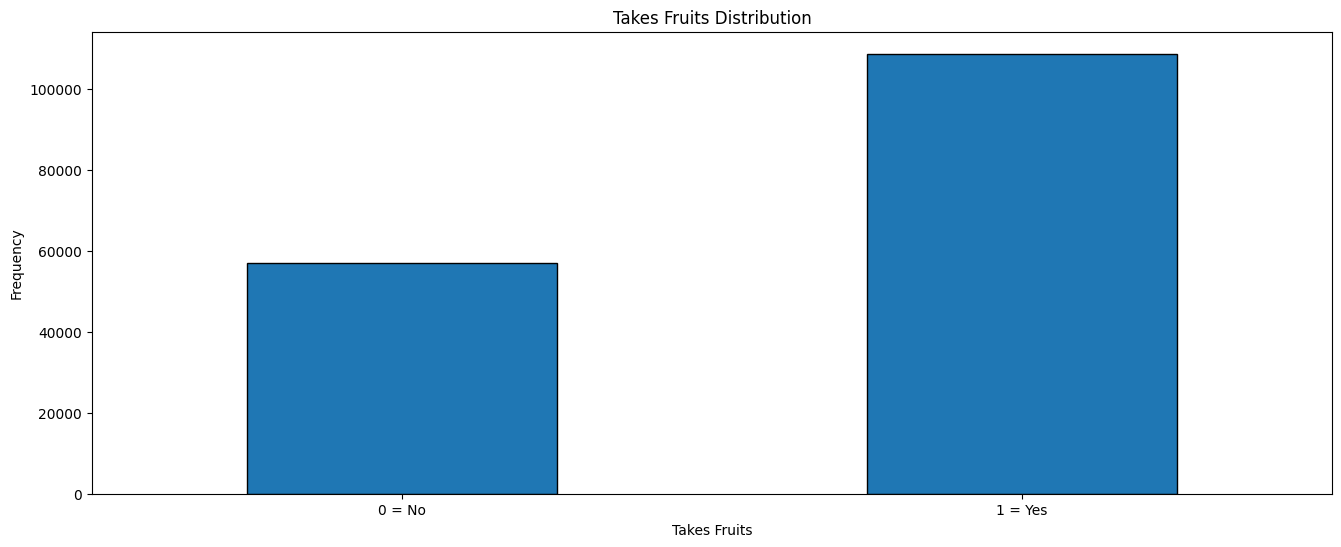

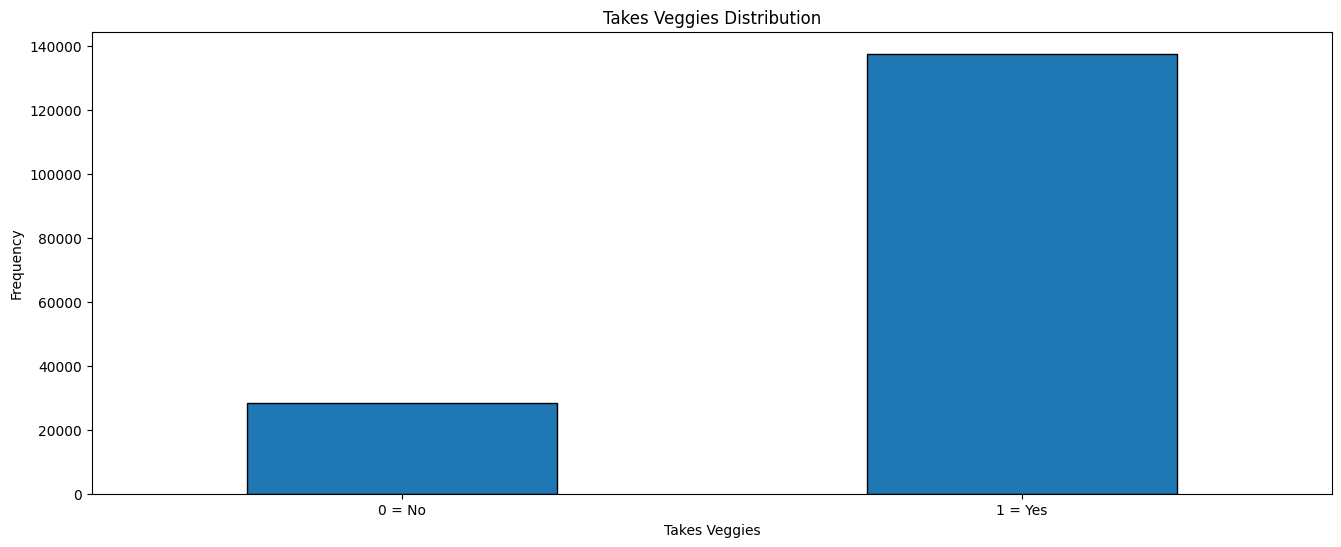

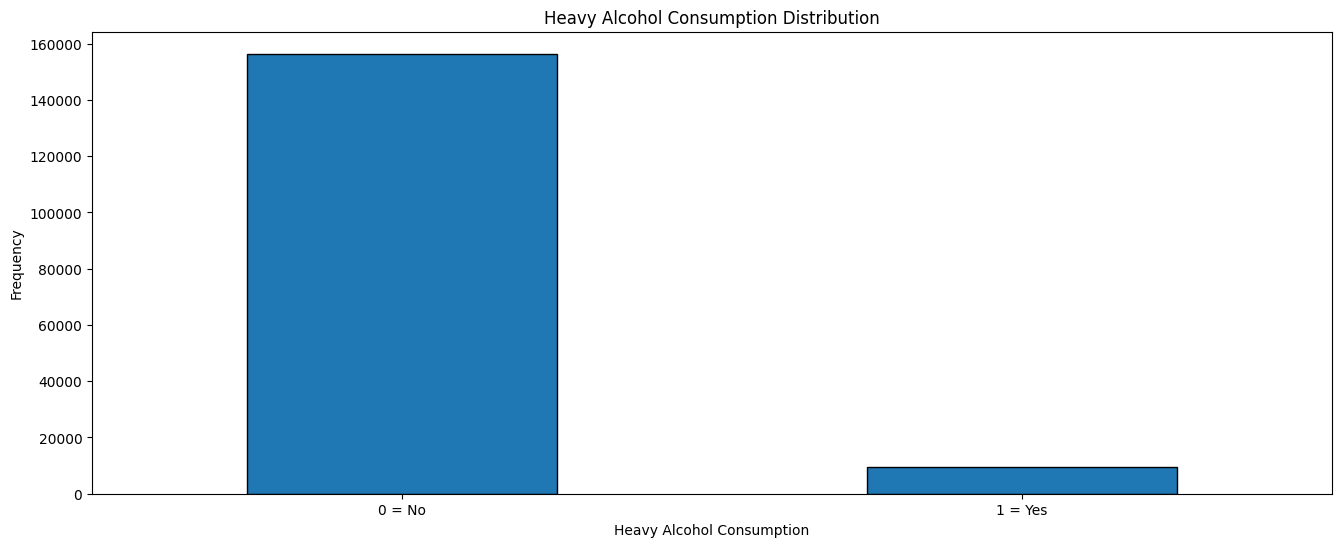

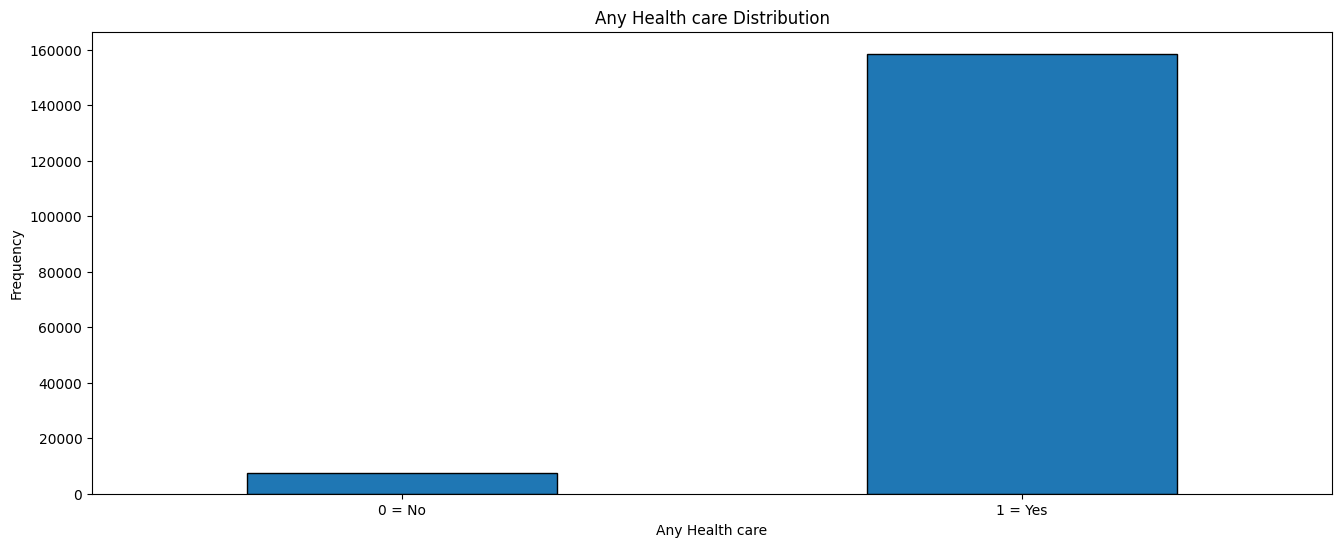

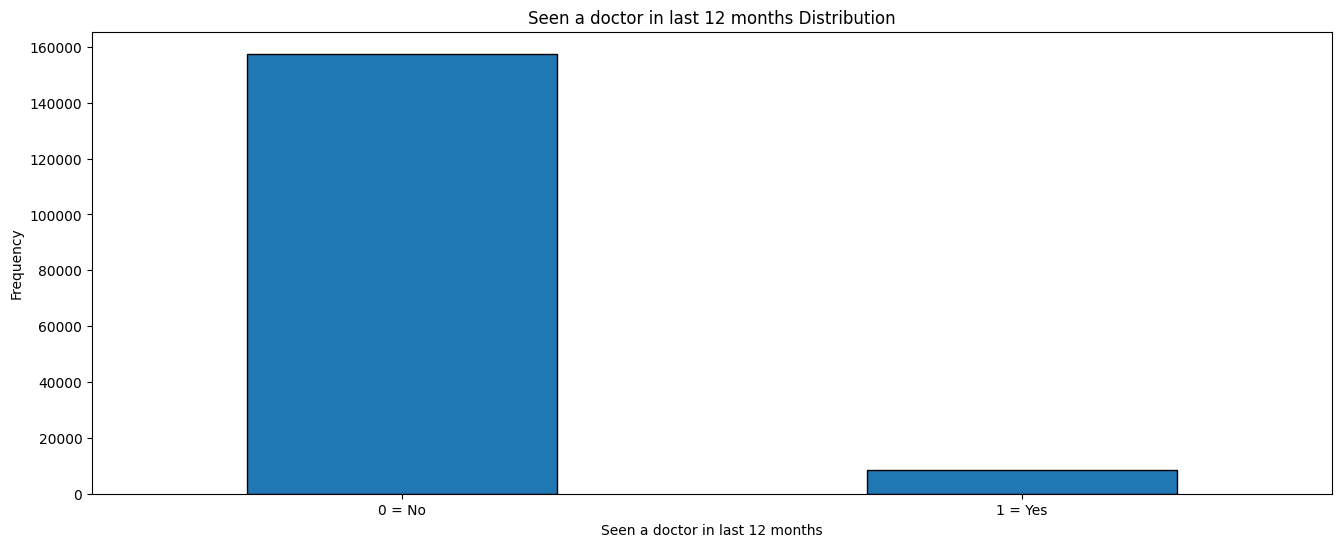

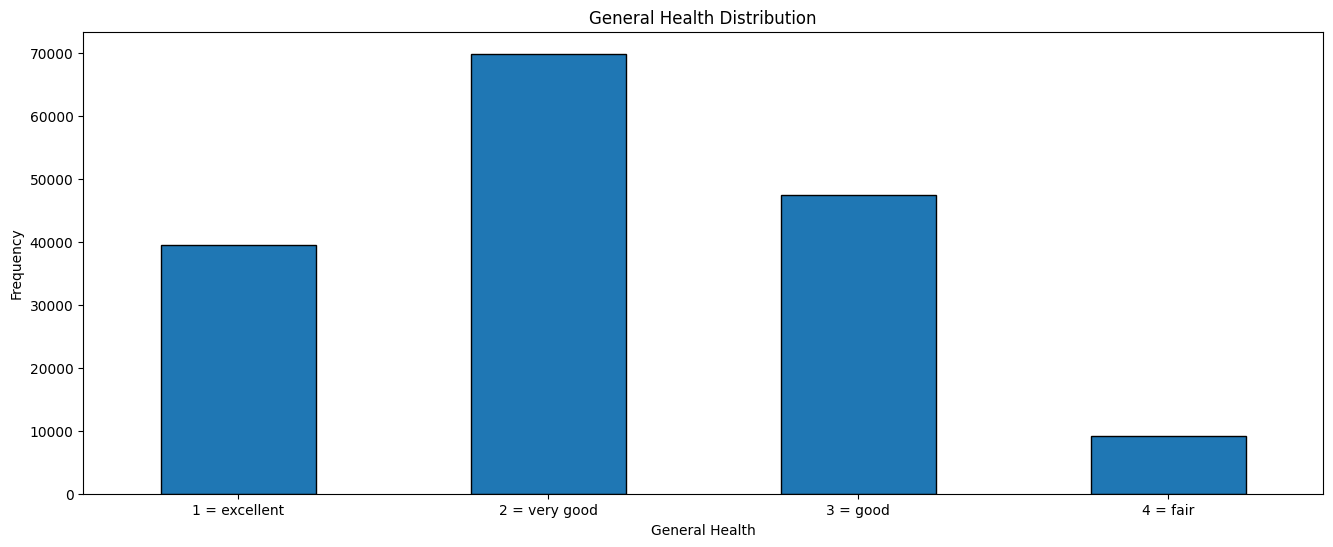

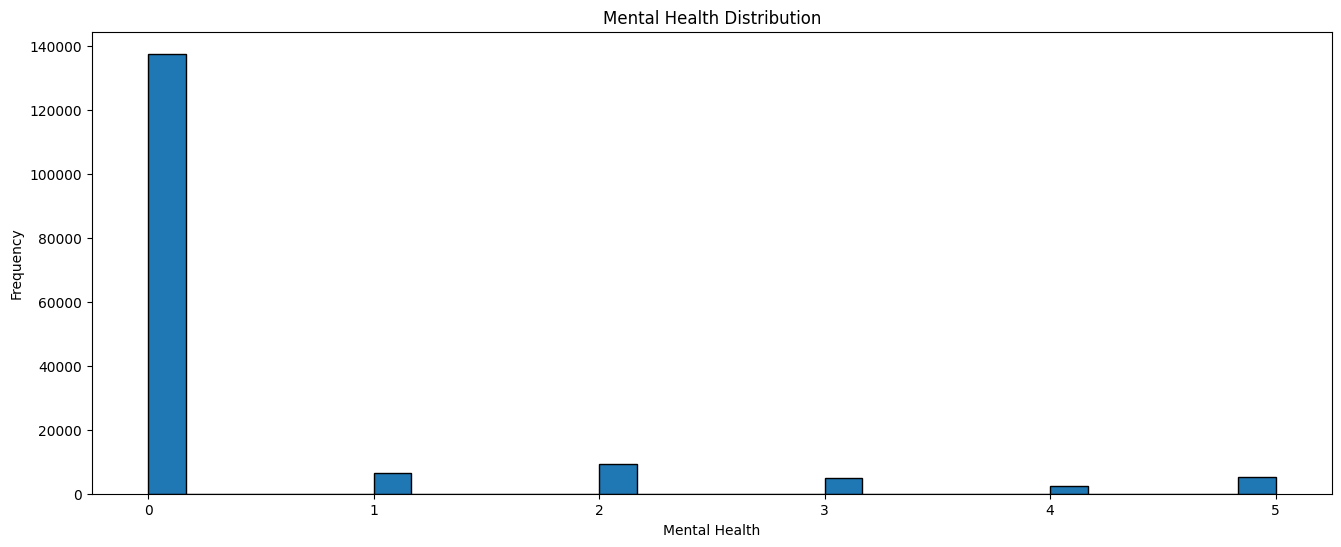

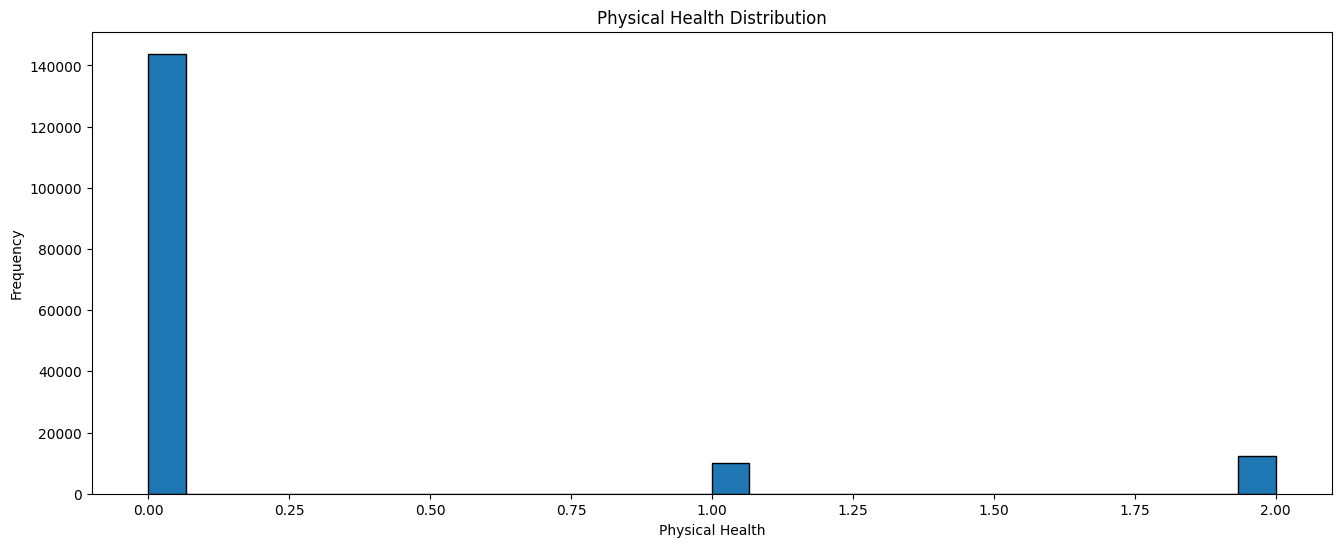

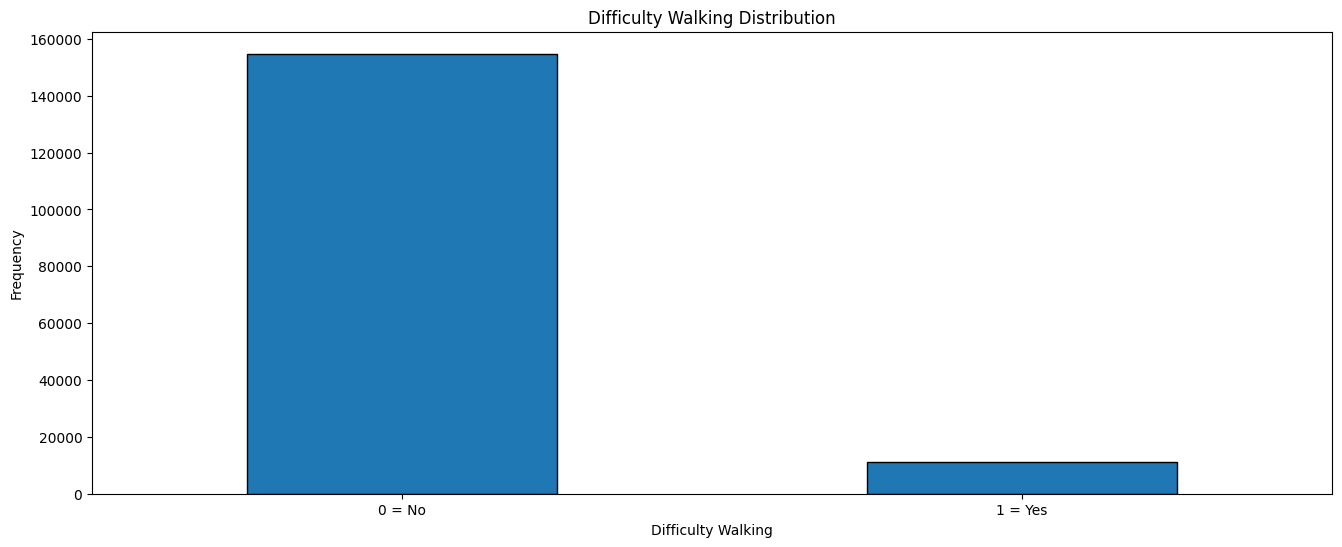

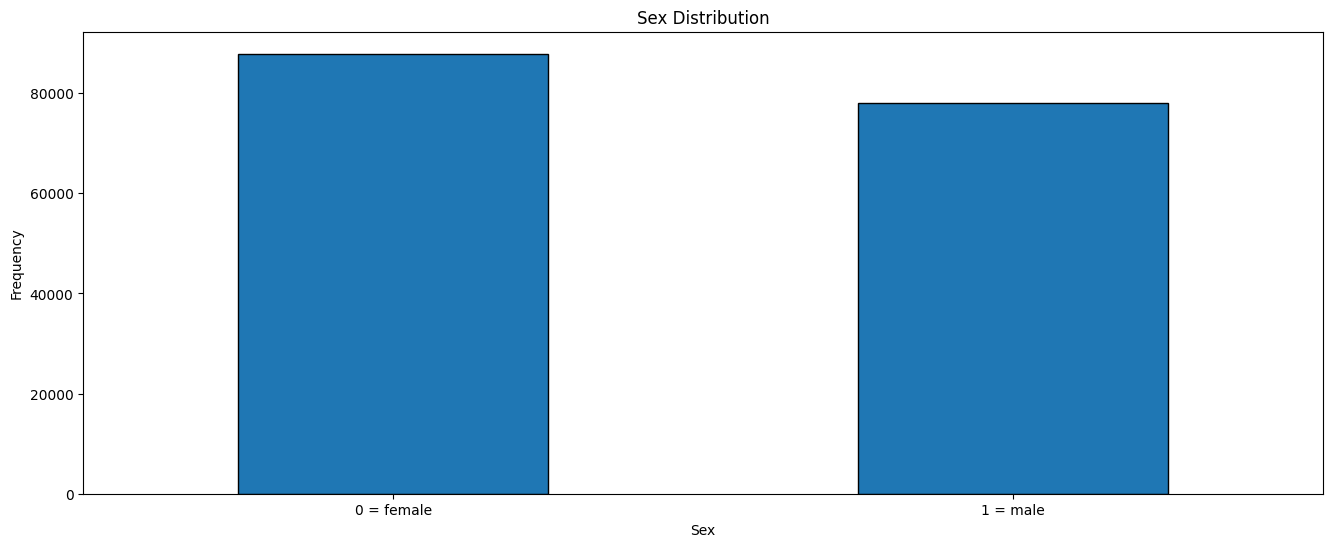

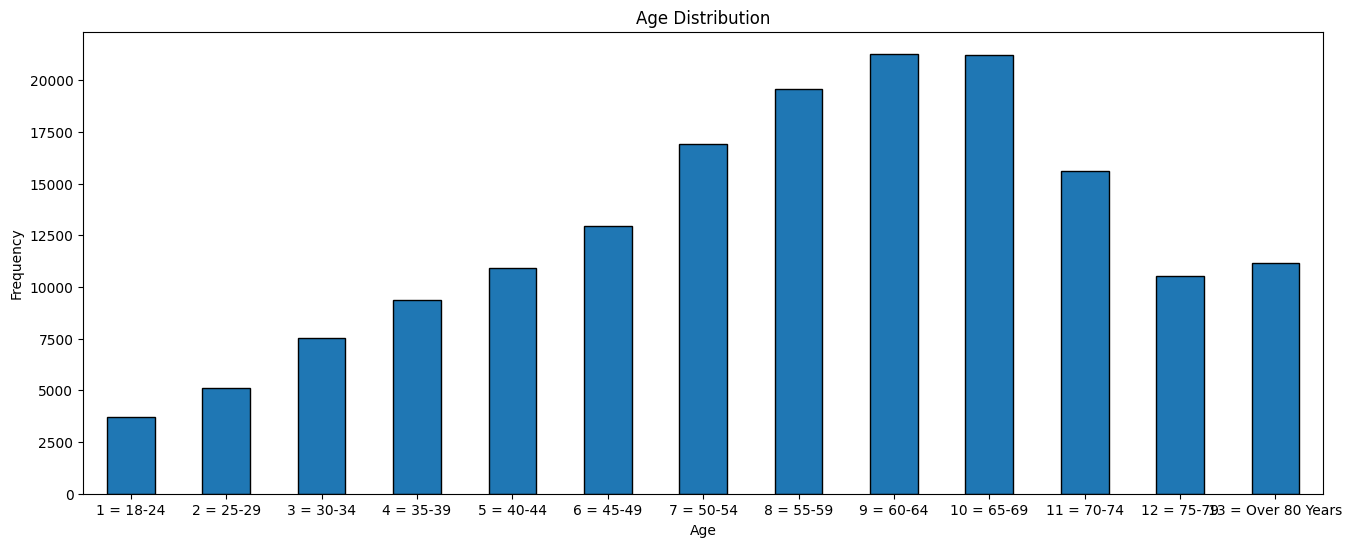

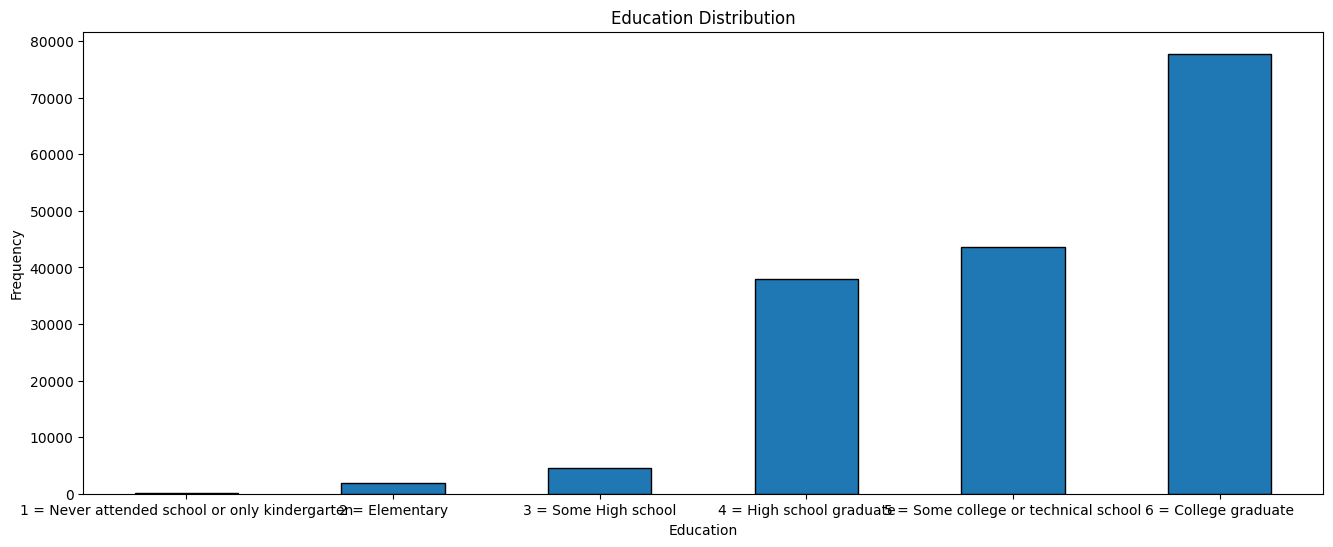

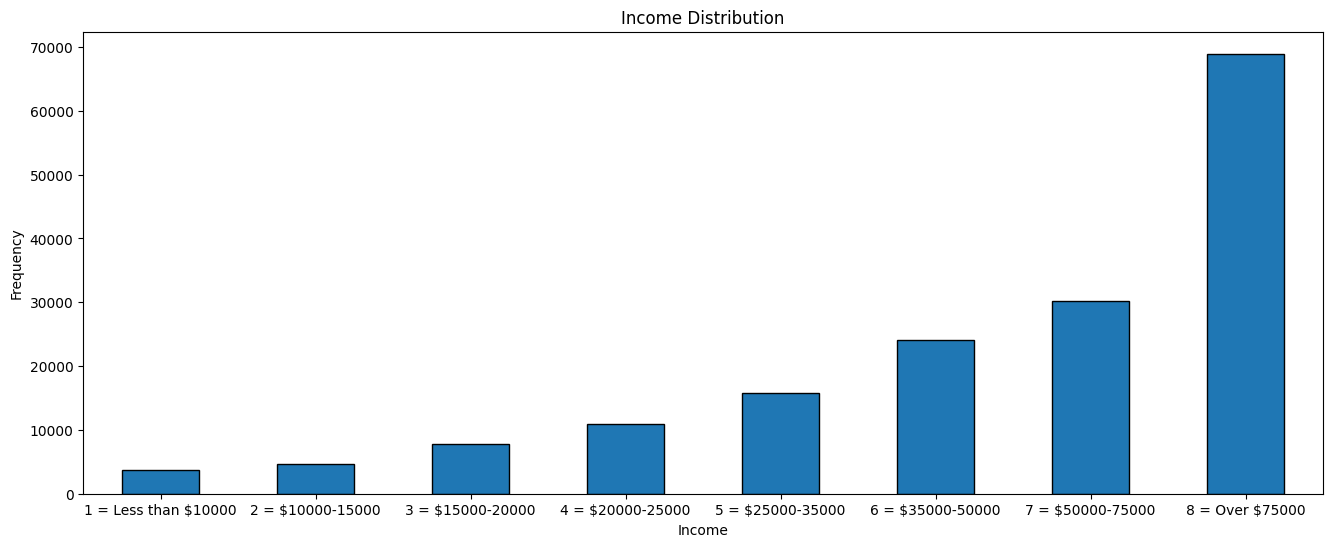

In [10]:

#Define column metadata
columns_info = {
    'Diabetes_binary': ('0 = No diabetes,1 = Prediabetes,2 = Diabetes', 'Diabetes status', 'Diabetes status Distribution'),
    'HighBP': ('0 = No high BP,1 = High BP', 'Blood pressure level', 'Blood pressure level Distribution'),
    'HighChol': ('0 = No high cholesterol,1 = High cholesterol', 'Cholesterol level', 'Cholesterol level Distribution'),
    'CholCheck': ('0 = no cholesterol check in 5 years,1 = yes cholesterol check in 5 years', 'Cholesterol check', 'Cholesterol check Distribution'),
    'BMI': ('Data as it is', 'Body Mass Index', 'Body Mass Index Distribution'),
    'Smoker': ('0 = No,1 = Yes', 'Smoker', 'Smoker Distribution'),
    'Stroke': ('0 = No,1 = Yes', 'Has Stroke', 'Has Stroke Distribution'),
    'HeartDiseaseorAttack': ('0 = No,1 = Yes', 'Has Heart Disease or Attack', 'Has Heart Disease or Attack Distribution'),
    'PhysActivity': ('0 = No,1 = Yes', 'Physical Activity', 'Physical Activity Distribution'),
    'Fruits': ('0 = No,1 = Yes', 'Takes Fruits', 'Takes Fruits Distribution'),
    'Veggies': ('0 = No,1 = Yes', 'Takes Veggies', 'Takes Veggies Distribution'),
    'HvyAlcoholConsump': ('0 = No,1 = Yes', 'Heavy Alcohol Consumption', 'Heavy Alcohol Consumption Distribution'),
    'AnyHealthcare': ('0 = No,1 = Yes', 'Any Health care', 'Any Health care Distribution'),
    'NoDocbcCost': ('0 = No,1 = Yes', 'Seen a doctor in last 12 months', 'Seen a doctor in last 12 months Distribution'),
    'GenHlth': ('1 = excellent,2 = very good,3 = good,4 = fair', 'General Health', 'General Health Distribution'),
    'MentHlth': ('0 = No,1 = Yes', 'Mental Health', 'Mental Health Distribution'),
    'PhysHlth': ('Data as it is', 'Physical Health', 'Physical Health Distribution'),
    'DiffWalk': ('0 = No,1 = Yes', 'Difficulty Walking', 'Difficulty Walking Distribution'),
    'Sex': ('0 = female,1 = male', 'Sex', 'Sex Distribution'),
    'Age': ('1 = 18-24,2 = 25-29,3 = 30-34,4 = 35-39,5 = 40-44,6 = 45-49,7 = 50-54,8 = 55-59,9 = 60-64,10 = 65-69,11 = 70-74,12 = 75-79,13 = Over 80 Years', 'Age', 'Age Distribution'),
    'Education': ('1 = Never attended school or only kindergarten,2 = Elementary,3 = Some High school,4 = High school graduate,5 = Some college or technical school,6 = College graduate', 'Education', 'Education Distribution'),
    'Income': ('1 = Less than $10000,2 = $10000-15000,3 = $15000-20000,4 = $20000-25000,5 = $25000-35000,6 = $35000-50000,7 = $50000-75000,8 = Over $75000', 'Income', 'Income Distribution')
}

# Create plots
for column, (x_labels, x_label, title) in columns_info.items():
    plt.figure(figsize=(16, 6))
    
    if column in ['BMI', 'MentHlth', 'PhysHlth']:
        plt.hist(data[column].dropna(), bins=30, edgecolor='k')
    elif 'Data as it is' in x_labels:
        plt.hist(data[column].dropna(), bins=30, edgecolor='k')
    else:
        value_counts = data[column].value_counts().sort_index()
        value_counts.plot(kind='bar', edgecolor='k')
        labels = x_labels.split(',')
        if len(labels) == len(value_counts):
            plt.xticks(ticks=range(len(value_counts)), labels=labels, rotation=0)
        else:
            plt.xticks(ticks=range(len(value_counts)), rotation=0)
    
    plt.xlabel(x_label)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()


### Bivariate Analysis

### 1. Bivariate Analysis on Diabetes_binary vs Other Risk Factors
Diabetes_binary, HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, 
PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, 
Sex, Education

Crosstab between Diabetes_binary and HighBP:
HighBP             0.0    1.0
Diabetes_binary              
0.0              97421  49035
1.0                990   1500
2.0               4871  12102

Chi-square test results: Chi2 = 9802.27, p-value = 0.00e+00



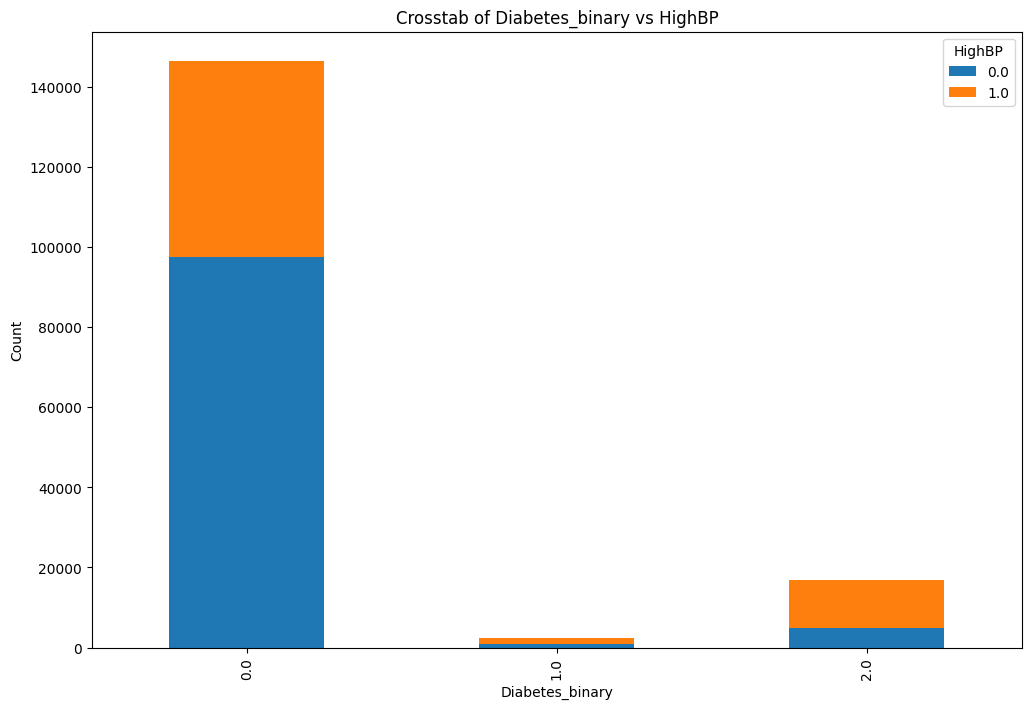

Crosstab between Diabetes_binary and HighChol:
HighChol           0.0    1.0
Diabetes_binary              
0.0              94445  52011
1.0               1021   1469
2.0               6249  10724

Chi-square test results: Chi2 = 5348.10, p-value = 0.00e+00



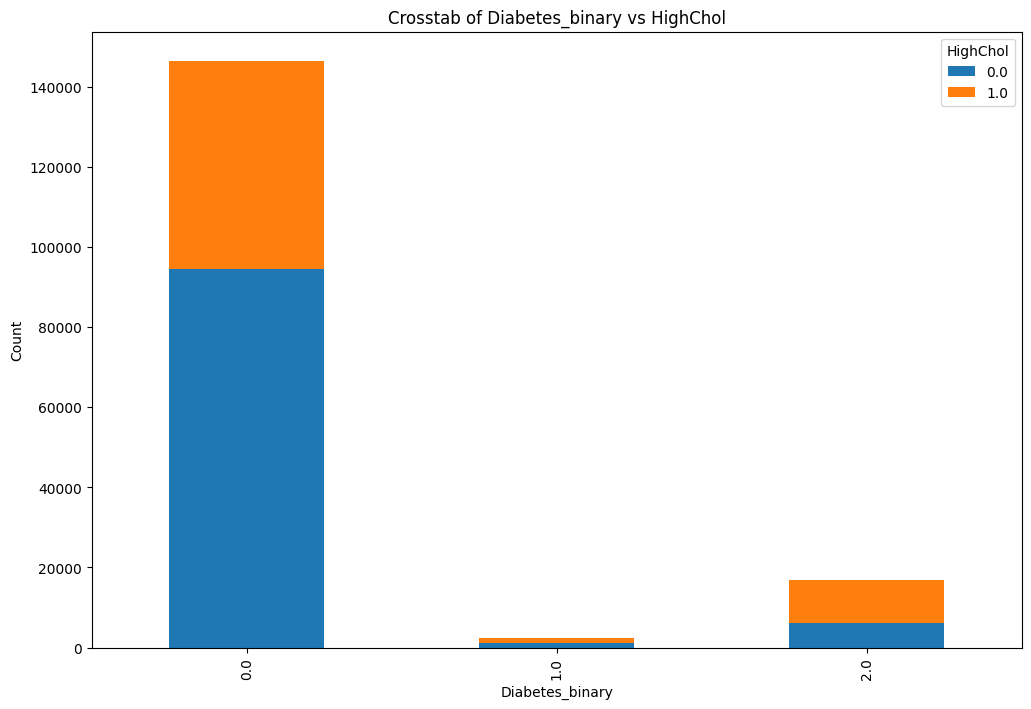

Crosstab between Diabetes_binary and CholCheck:
CholCheck         0.0     1.0
Diabetes_binary              
0.0              6540  139916
1.0                32    2458
2.0                96   16877

Chi-square test results: Chi2 = 648.71, p-value = 1.36e-141



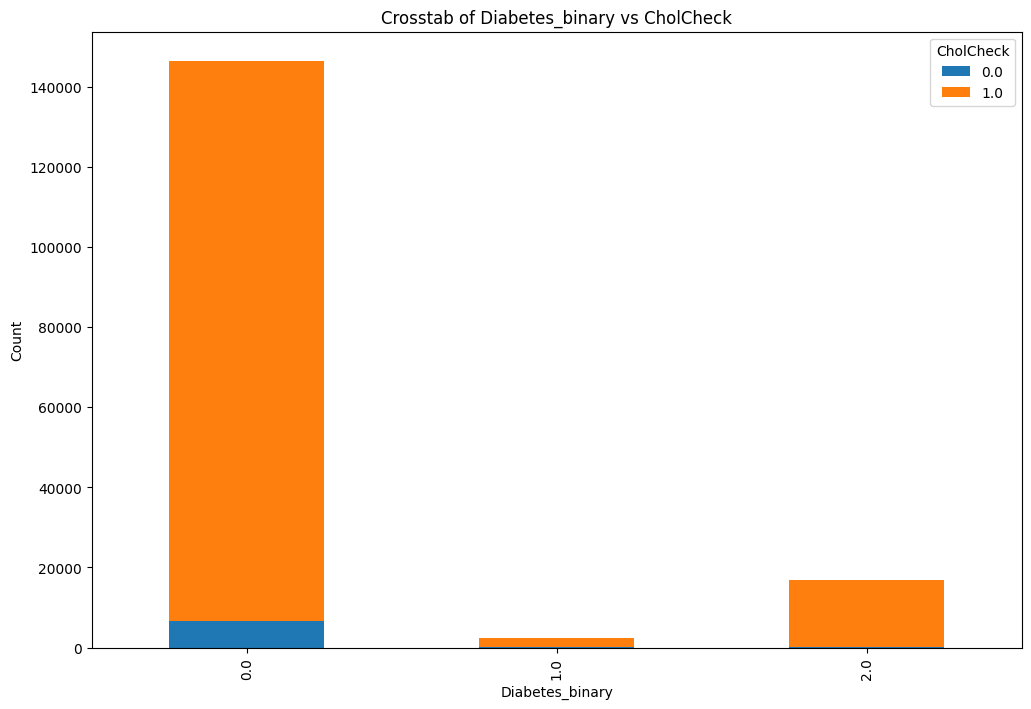

Crosstab between Diabetes_binary and Smoker:
Smoker             0.0    1.0
Diabetes_binary              
0.0              88259  58197
1.0               1361   1129
2.0               8750   8223

Chi-square test results: Chi2 = 500.58, p-value = 2.00e-109



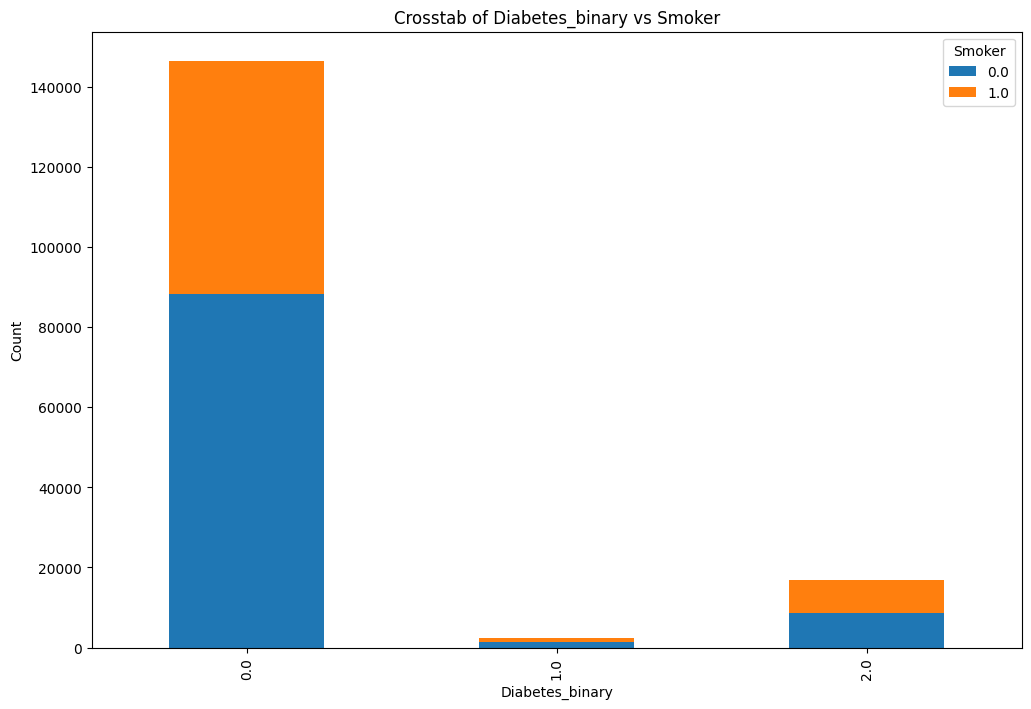

Crosstab between Diabetes_binary and Stroke:
Stroke              0.0   1.0
Diabetes_binary              
0.0              143427  3029
1.0                2398    92
2.0               15947  1026

Chi-square test results: Chi2 = 1001.87, p-value = 2.80e-218



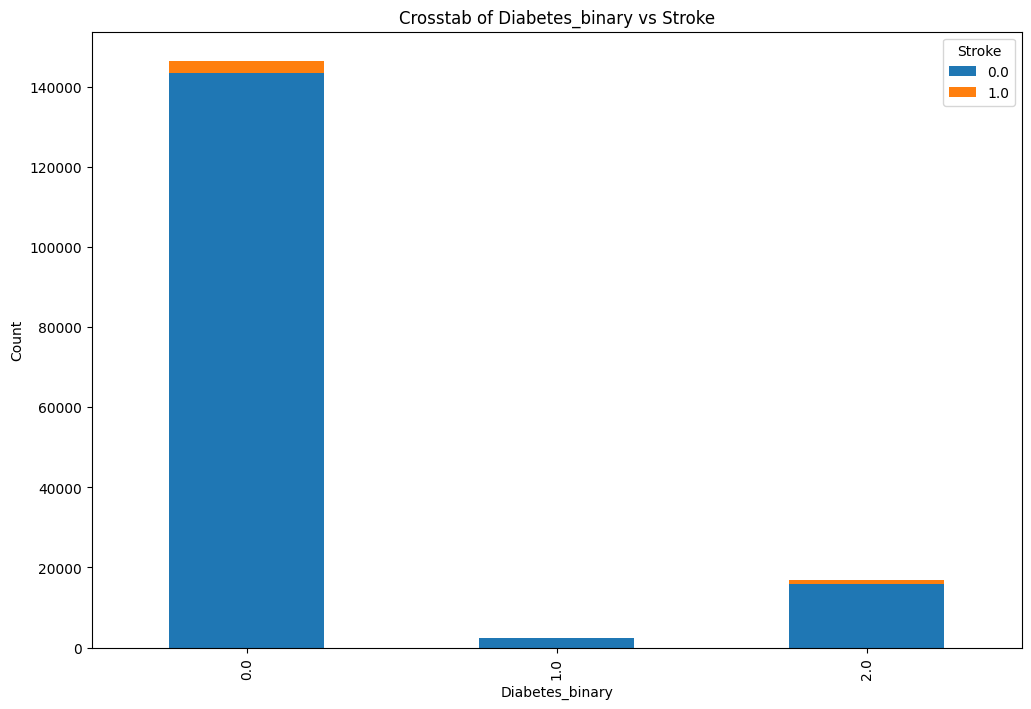

Crosstab between Diabetes_binary and HeartDiseaseorAttack:
HeartDiseaseorAttack     0.0   1.0
Diabetes_binary                   
0.0                   138702  7754
1.0                     2232   258
2.0                    14163  2810

Chi-square test results: Chi2 = 3224.79, p-value = 0.00e+00



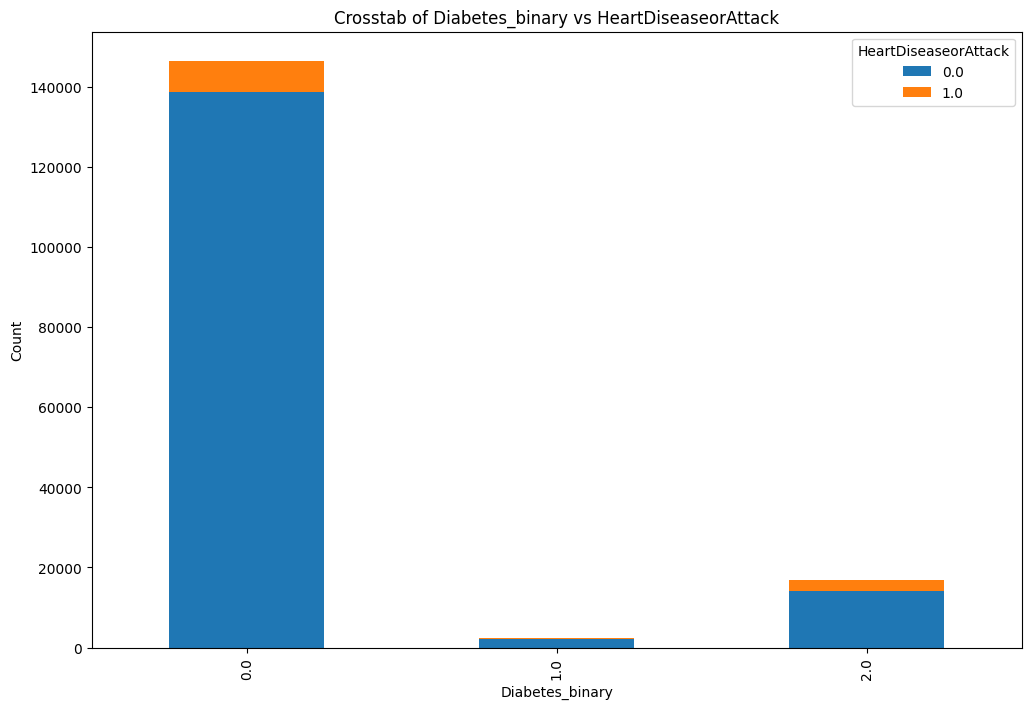

Crosstab between Diabetes_binary and AnyHealthcare:
AnyHealthcare     0.0     1.0
Diabetes_binary              
0.0              6646  139810
1.0               103    2387
2.0               571   16402

Chi-square test results: Chi2 = 50.14, p-value = 1.29e-11



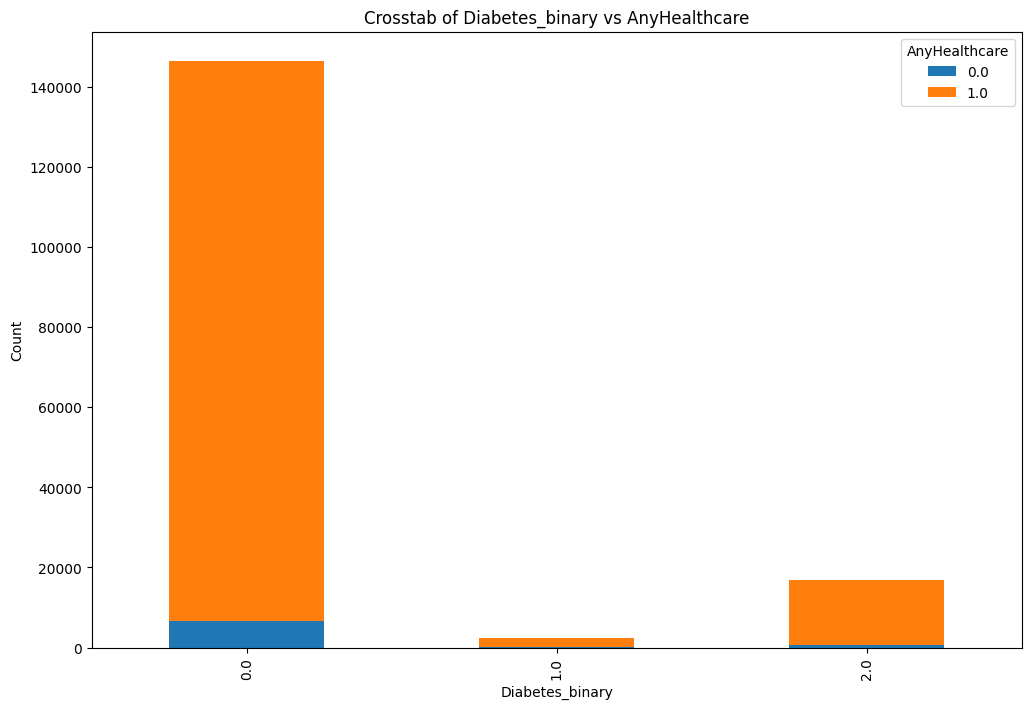

Crosstab between Diabetes_binary and NoDocbcCost:
NoDocbcCost         0.0   1.0
Diabetes_binary              
0.0              139177  7279
1.0                2332   158
2.0               16068   905

Chi-square test results: Chi2 = 13.36, p-value = 1.25e-03



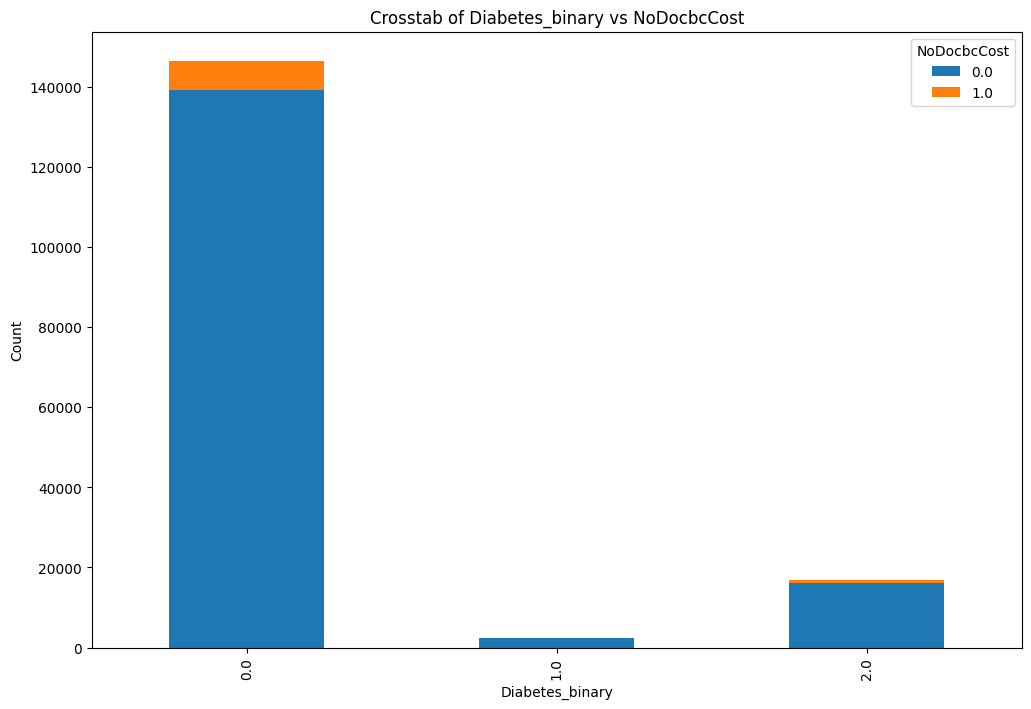

Crosstab between Diabetes_binary and DiffWalk:
DiffWalk            0.0   1.0
Diabetes_binary              
0.0              138417  8039
1.0                2177   313
2.0               14201  2772

Chi-square test results: Chi2 = 2997.92, p-value = 0.00e+00



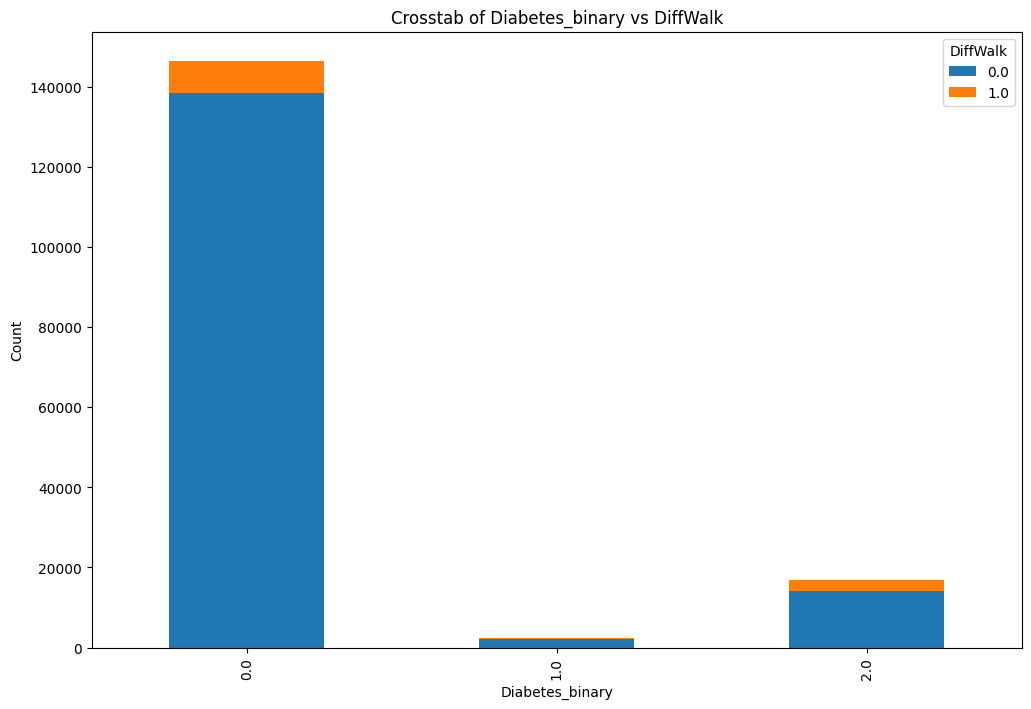

Crosstab between Diabetes_binary and HighBP:
HighBP             0.0    1.0
Diabetes_binary              
0.0              97421  49035
1.0                990   1500
2.0               4871  12102

Chi-square test results: Chi2 = 9802.27, p-value = 0.00e+00



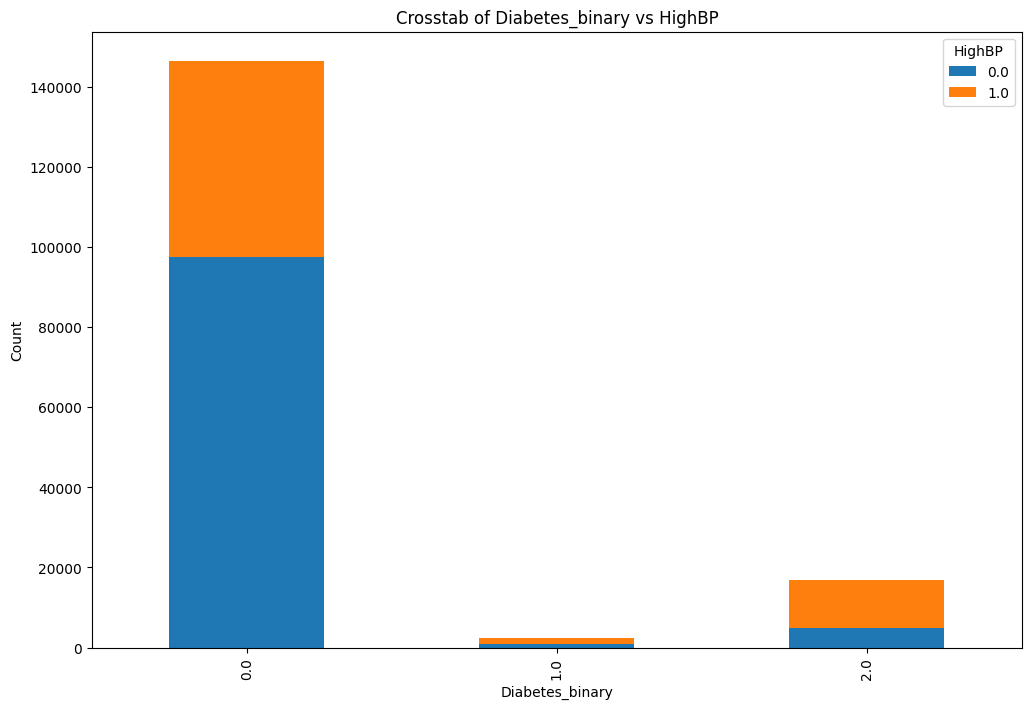

Crosstab between Diabetes_binary and Sex:
Sex                0.0    1.0
Diabetes_binary              
0.0              78866  67590
1.0               1258   1232
2.0               7738   9235

Chi-square test results: Chi2 = 422.52, p-value = 1.78e-92



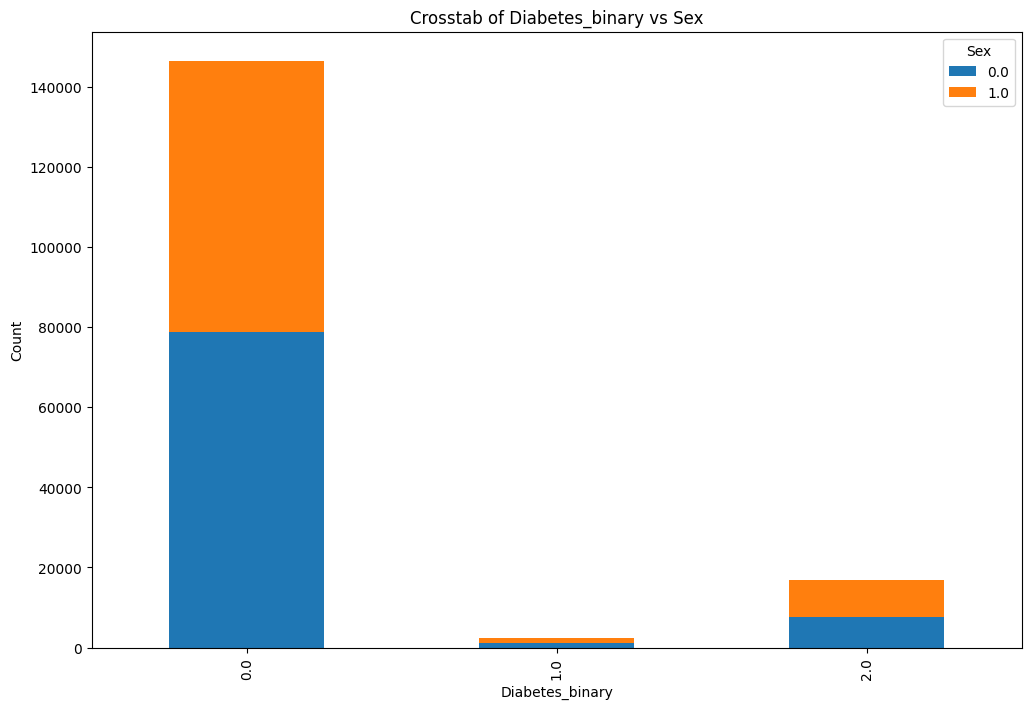

Crosstab between Diabetes_binary and Education:
Education        1.0   2.0   3.0    4.0    5.0    6.0
Diabetes_binary                                      
0.0               67  1442  3587  32318  38029  71013
1.0                0    65   132    686    705    902
2.0               14   402   813   5037   4833   5874

Chi-square test results: Chi2 = 1806.17, p-value = 0.00e+00



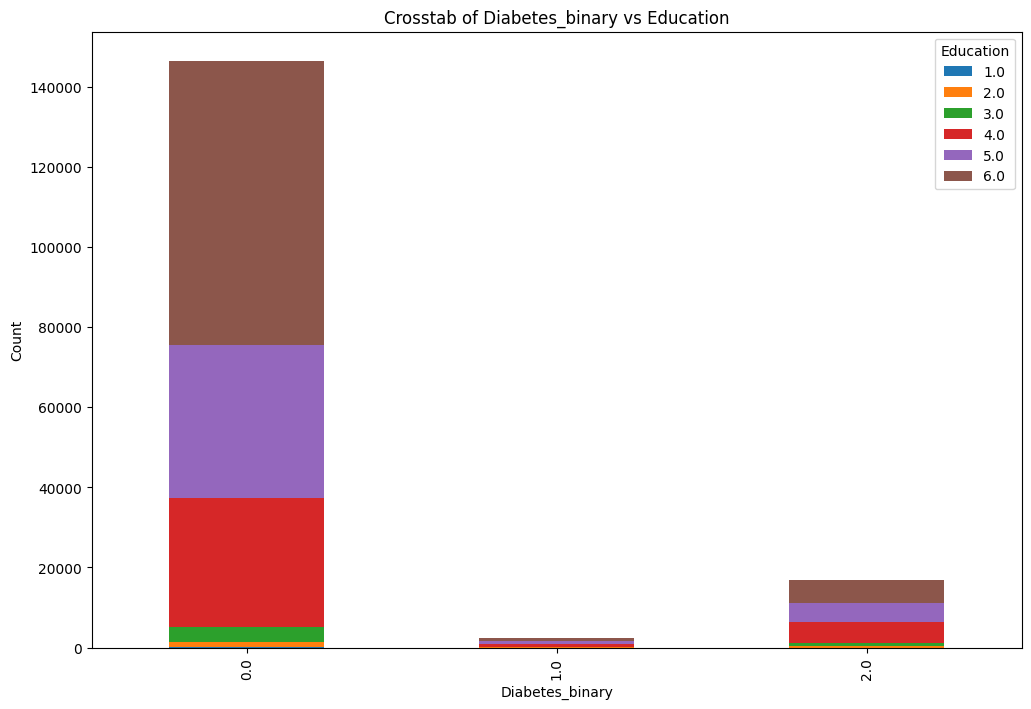

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to create a crosstab and perform chi-square test for categorical variables
def crosstab_analysis(data, col1, col2):
    crosstab = pd.crosstab(data[col1], data[col2])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    
    
    print(f"Crosstab between {col1} and {col2}:")
    print(crosstab)
    print(f"\nChi-square test results: Chi2 = {chi2:.2f}, p-value = {p:.2e}\n")
    
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title(f'Crosstab of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.show()

# Continuous variables for correlation matrix
continuous_vars = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'GenHlth', 'Income']

# List of categorical variables
categorical_vars = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
                    'DiffWalk', 'Sex', 'Education']

# Example crosstab analysis between categorical variables

crosstab_analysis(data, 'Diabetes_binary', 'HighBP')
crosstab_analysis(data, 'Diabetes_binary', 'HighChol')
crosstab_analysis(data, 'Diabetes_binary', 'CholCheck')
crosstab_analysis(data, 'Diabetes_binary', 'Smoker')
crosstab_analysis(data, 'Diabetes_binary', 'Stroke')
crosstab_analysis(data, 'Diabetes_binary', 'HeartDiseaseorAttack')
crosstab_analysis(data, 'Diabetes_binary', 'AnyHealthcare')
crosstab_analysis(data, 'Diabetes_binary', 'NoDocbcCost')
crosstab_analysis(data, 'Diabetes_binary', 'DiffWalk')
crosstab_analysis(data, 'Diabetes_binary', 'HighBP')
crosstab_analysis(data, 'Diabetes_binary', 'Sex')
crosstab_analysis(data, 'Diabetes_binary', 'Education')

# You can perform more crosstab analysis between other pairs of categorical variables as needed


### Observations

Diabetes_binary vs HighBP:

    The crosstab shows a higher proportion of diabetes cases among individuals with high blood pressure (HighBP = 1) compared to those without high blood pressure (HighBP = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 16602 individuals have high blood pressure compared to 5861 who do not.

Diabetes_binary vs HighChol:

    The crosstab indicates that a higher proportion of individuals with diabetes have high cholesterol (HighChol = 1) compared to those without high cholesterol (HighChol = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 12193 individuals have high cholesterol compared to 7270 who do not.

Diabetes_binary vs CholCheck:

    The crosstab reveals that a majority of individuals with diabetes have had their cholesterol checked in the past 5 years (CholCheck = 1).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 19335 individuals have had their cholesterol checked compared to only 128 who have not.

Diabetes_binary vs Smoker:

    The crosstab shows that the proportion of diabetes cases is higher among smokers (Smoker = 1) compared to non-smokers (Smoker = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 9352 individuals are smokers compared to 10111 who are non-smokers.

Diabetes_binary vs Stroke:

    The crosstab indicates that a higher proportion of individuals with diabetes have had a stroke (Stroke = 1) compared to those who have not had a stroke (Stroke = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 1118 individuals have had a stroke compared to 18345 who have not.

Diabetes_binary vs HeartDiseaseorAttack:

    The crosstab reveals a higher proportion of diabetes cases among individuals with a history of coronary heart disease or myocardial infarction (HeartDiseaseorAttack = 1) compared to those without such history (HeartDiseaseorAttack = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 3068 individuals have a history of heart disease or attack compared to 16415 who do not.

Diabetes_binary vs AnyHealthcare:

    The crosstab shows that a majority of individuals with diabetes have some form of healthcare coverage (AnyHealthcare = 1).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 18789 individuals have healthcare coverage compared to 674 who do not.

Diabetes_binary vs NoDocbcCost:

    The crosstab indicates that a higher proportion of diabetes cases did not have an instance where they couldn't see a doctor due to cost in the past 12 months (NoDocbcCost = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 18398 individuals did not face cost-related issues in seeing a doctor compared to 1063 who did.

Diabetes_binary vs DiffWalk:

    The crosstab reveals that a higher proportion of individuals with diabetes have serious difficulty walking or climbing stairs (DiffWalk = 1) compared to those who do not have such difficulty (DiffWalk = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 3085 individuals have difficulty walking compared to 16378 who do not.

Diabetes_binary vs Sex:

    The crosstab shows a slightly higher proportion of diabetes cases among males (Sex = 1) compared to females (Sex = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 10467 are males compared to 8996 who are females.

Diabetes_binary vs Education:

    The crosstab indicates that the majority of diabetes cases are among individuals with some college education or higher (Education levels 4.0, 5.0, and 6.0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 15708 individuals have education levels 4.0, 5.0, or 6.0 compared to 795 individuals with education levels 1.0, 2.0, or 3.0.

### HighBP vs Other Variables
Age, BMI, GenHlth, PhysHlth

Age: Check if age is associated with high blood pressure.

BMI: Analyze the relationship between BMI and high blood pressure.

PhysActivity: Determine if physical activity is associated with high blood pressure.

GenHlth: Analyze the relationship between general health and high blood pressure.

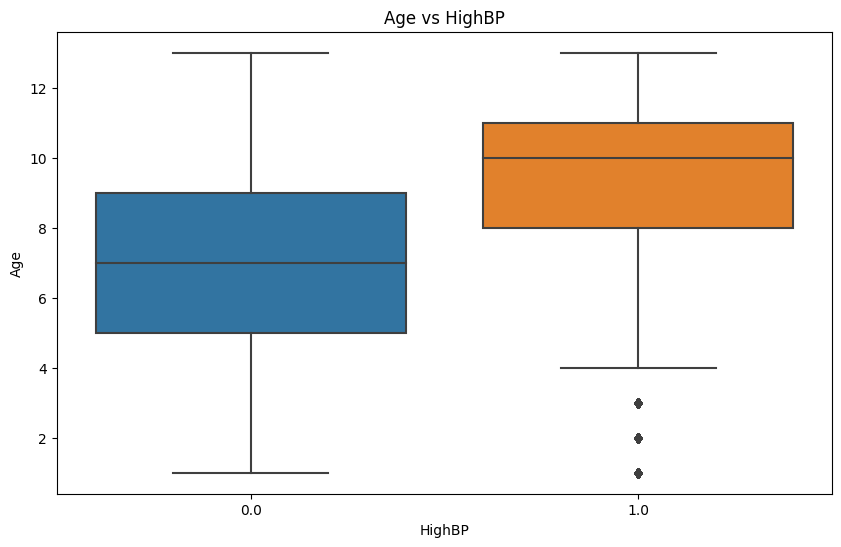

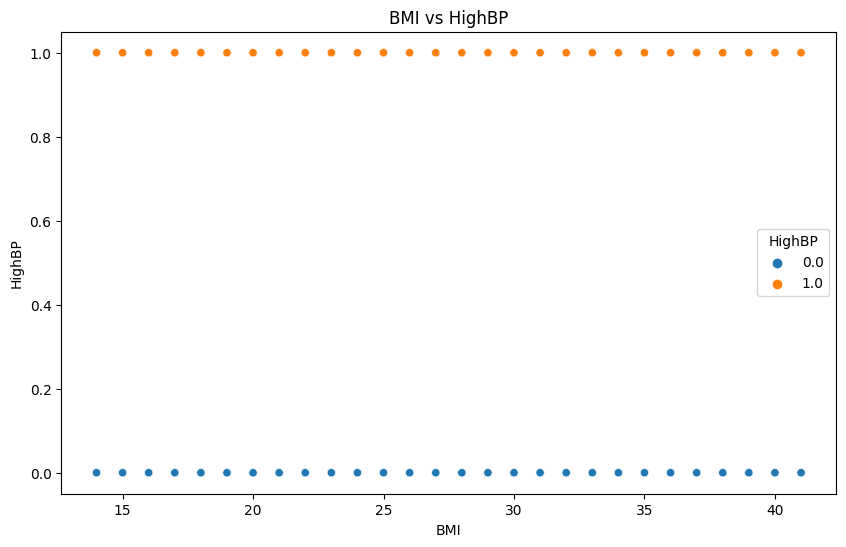

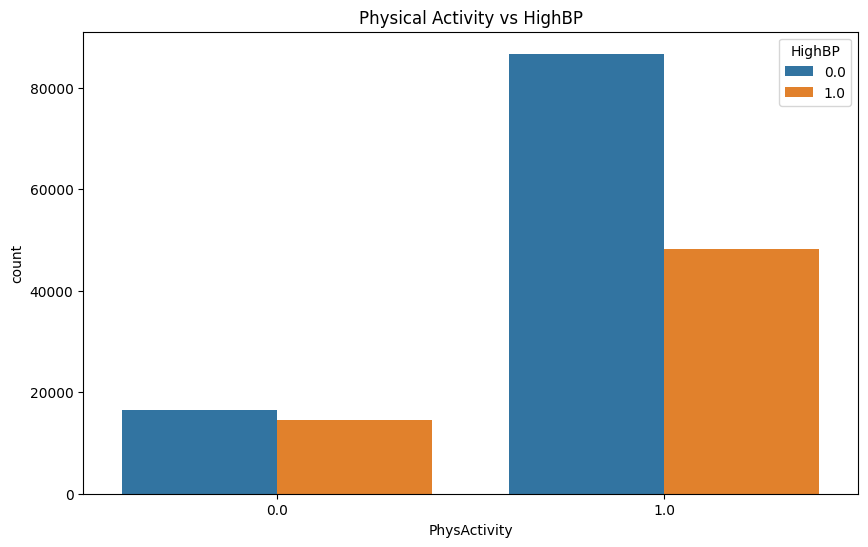

<function matplotlib.pyplot.show(close=None, block=None)>

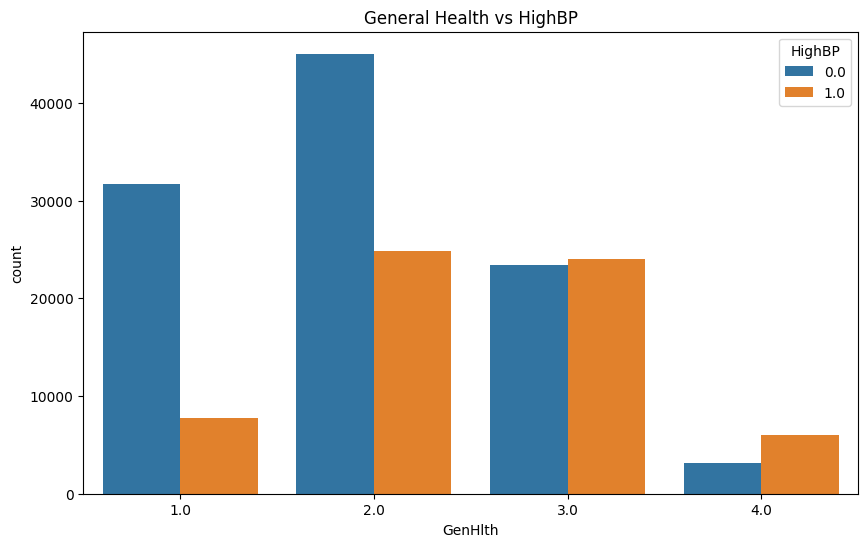

In [12]:
#code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame

# 1. Age vs HighBP
plt.figure(figsize=(10, 6))
sns.boxplot(x='HighBP', y='Age', data=data)
plt.title('Age vs HighBP')
plt.show()

# 2. BMI vs HighBP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='HighBP', hue='HighBP', data=data)
plt.title('BMI vs HighBP')
plt.show()

# 3. PhysActivity vs HighBP
plt.figure(figsize=(10, 6))
sns.countplot(x='PhysActivity', hue='HighBP', data=data)
plt.title('Physical Activity vs HighBP')
plt.show()

# 4. GenHlth vs HighBP
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHlth', hue='HighBP', data=data)
plt.title('General Health vs HighBP')
plt.show


### Observation

1. Age vs HighBP
 
    The boxplot indicates that most people with High BP are in the age band (8-11)

### HighChol vs Other Variables
Age, BMI, GenHlth, PhysHlth

Age: Check the relationship between Age and high cholesterol.

BMI: Check the relationship between BMI and high cholesterol

PhysActivity: Determine if physical activity is associated with high cholesterol.

GenHlth: Analyze the relationship between general health and high cholesterol.

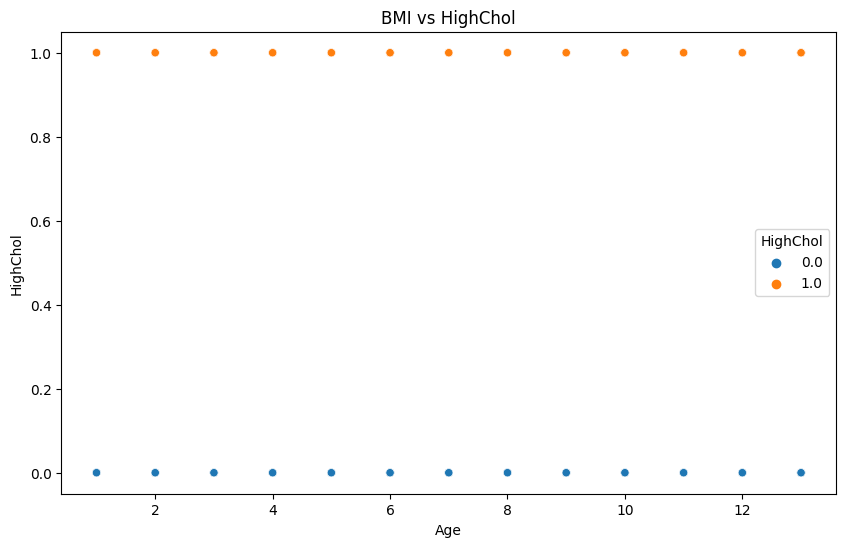

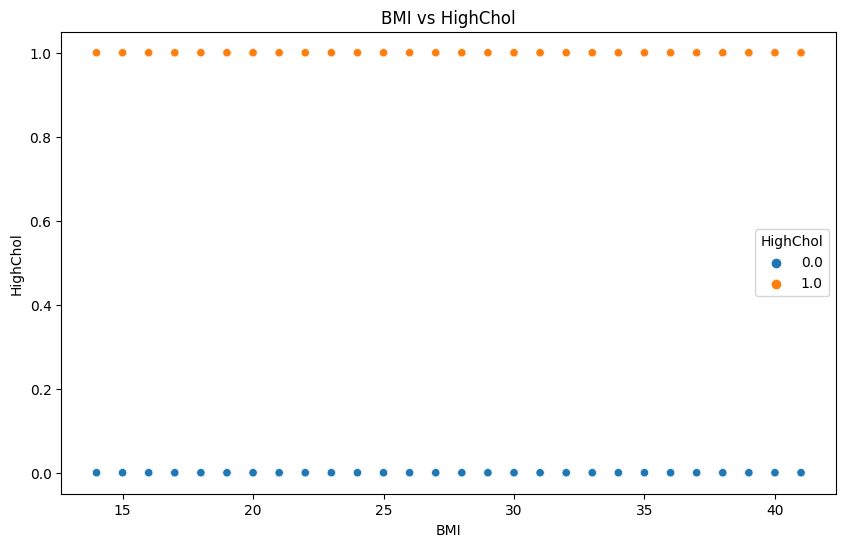

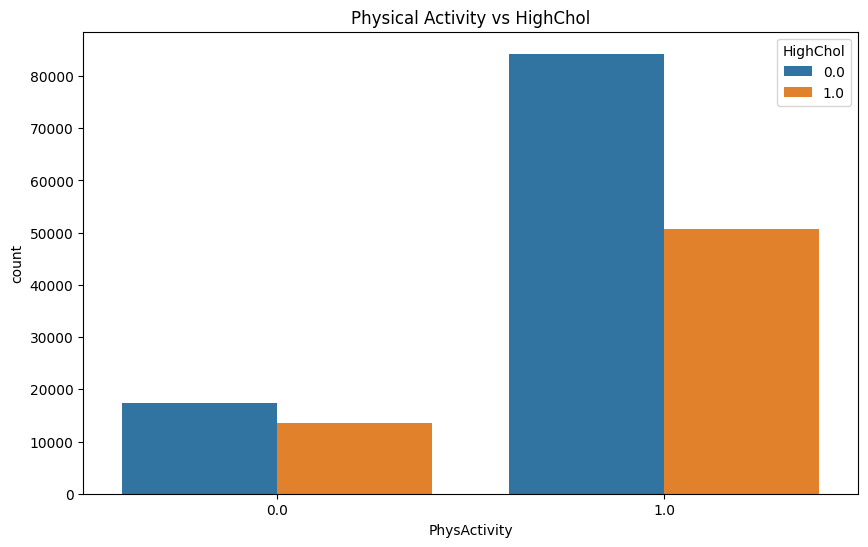

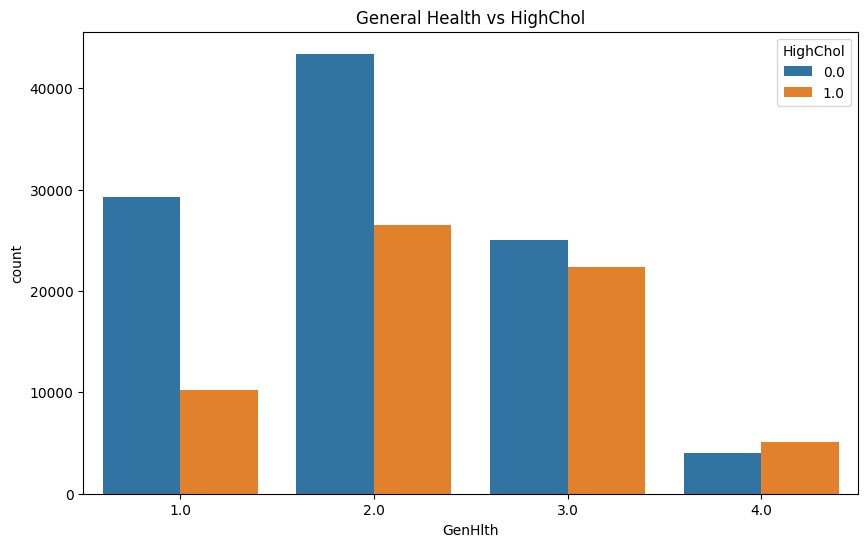

In [13]:
#code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame

# 0. Age vs HighChol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='HighChol', hue='HighChol', data=data)
plt.title('BMI vs HighChol')
plt.show()

# 1. BMI vs HighChol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='HighChol', hue='HighChol', data=data)
plt.title('BMI vs HighChol')
plt.show()

# 2. PhysActivity vs HighChol
plt.figure(figsize=(10, 6))
sns.countplot(x='PhysActivity', hue='HighChol', data=data)
plt.title('Physical Activity vs HighChol')
plt.show()

# 3. GenHlth vs HighChol
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHlth', hue='HighChol', data=data)
plt.title('General Health vs HighChol')
plt.show()


### Observations

### BMI vs Other Variables

    PhysActivity: Analyze the relationship between physical activity and BMI.
    
    GenHlth: Determine the relationship between general health and BMI.
    
    Age: Check the relationship between age and BMI.

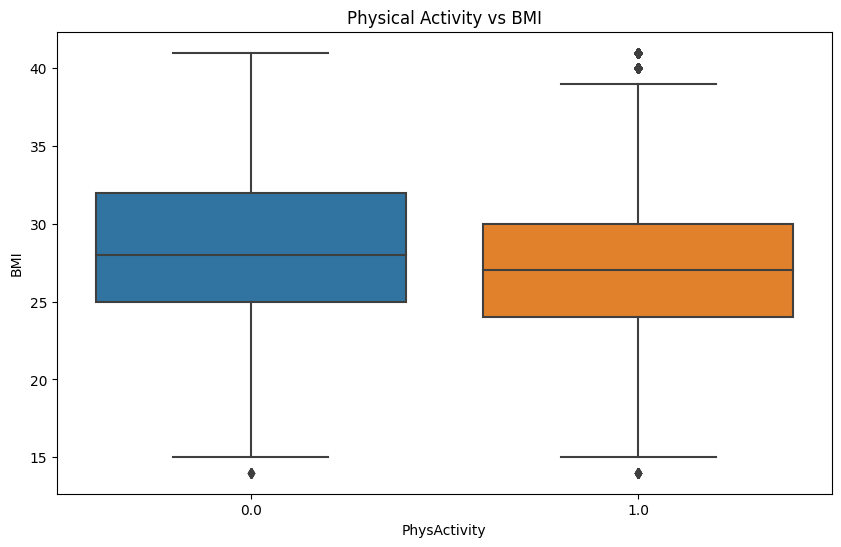

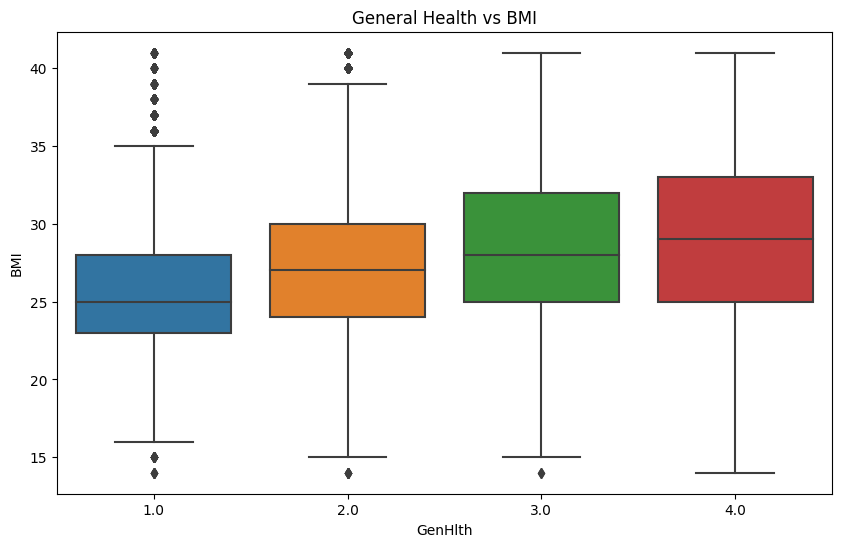

C:\Users\DANIEL\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


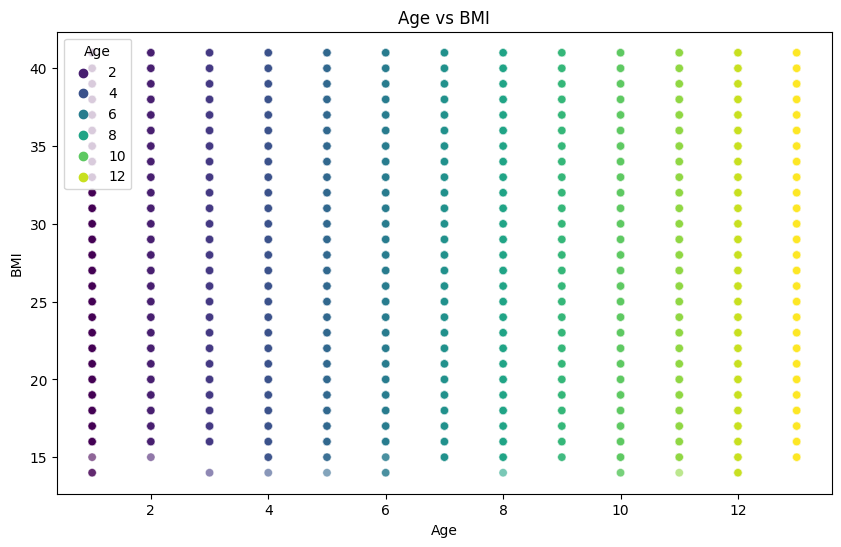

In [14]:
#code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame

# 1. PhysActivity vs BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='PhysActivity', y='BMI', data=data)
plt.title('Physical Activity vs BMI')
plt.show()

# 2. GenHlth vs BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHlth', y='BMI', data=data)
plt.title('General Health vs BMI')
plt.show()

# 3. Age vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='Age', data=data, palette='viridis', alpha=0.6)
plt.title('Age vs BMI')
plt.show()


### Observations

### GenHlth vs Other Variables
Age, BMI, MentHlth, PhysHlth

    MentHlth: Analyze the relationship between mental health and general health.

    PhysHlth: Determine the relationship between physical health and general health.

    PhysActivity: Check if physical activity is associated with general health.

    Age: Analyze the relationship between age and general health.

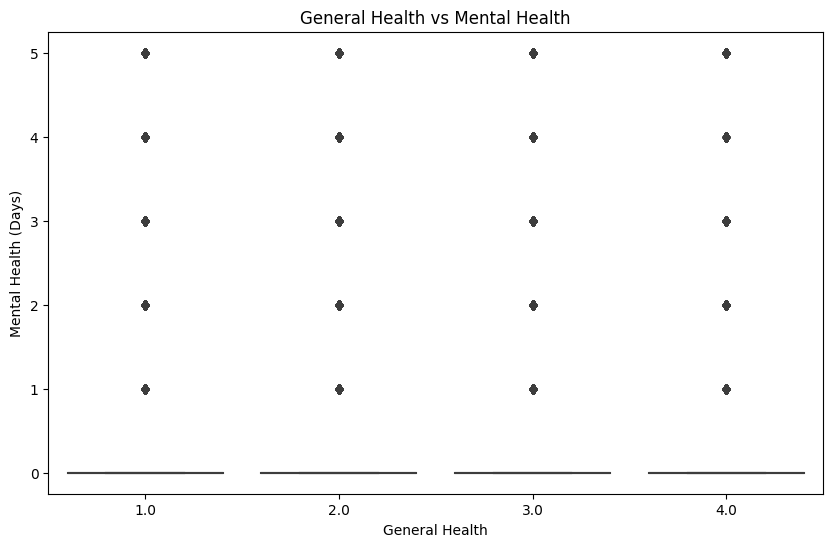

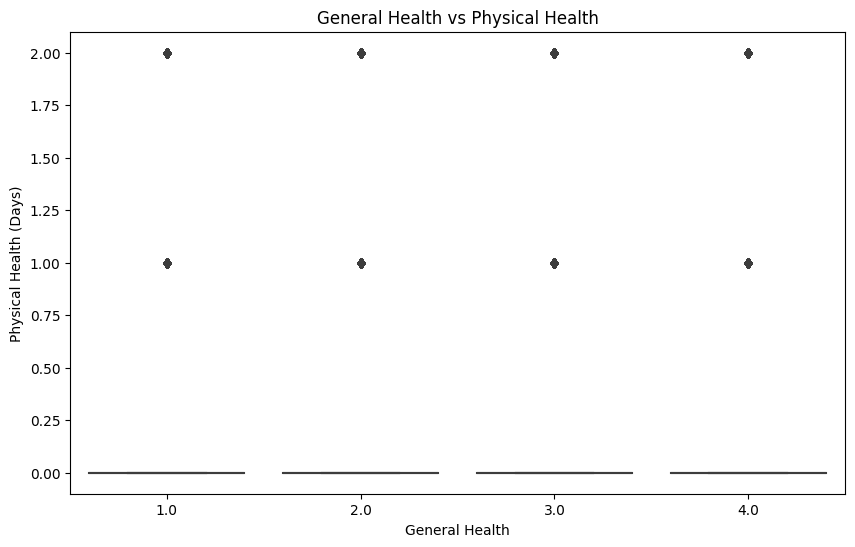

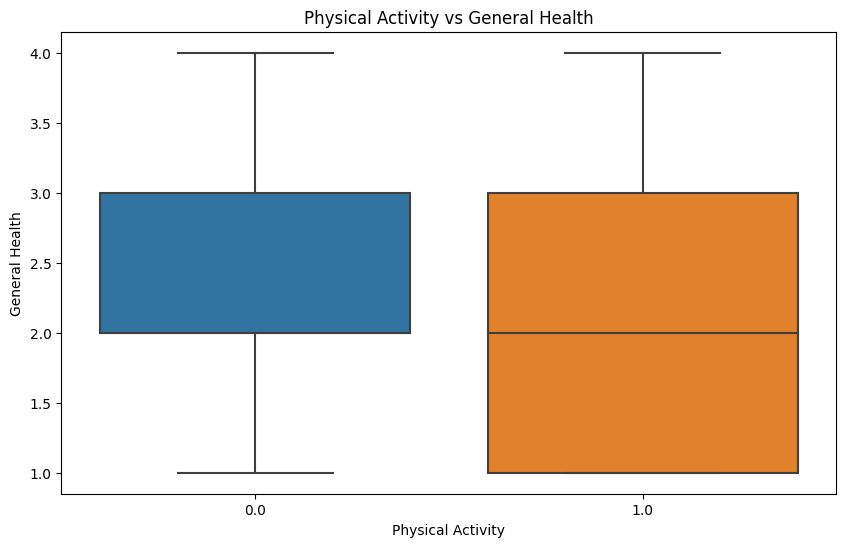

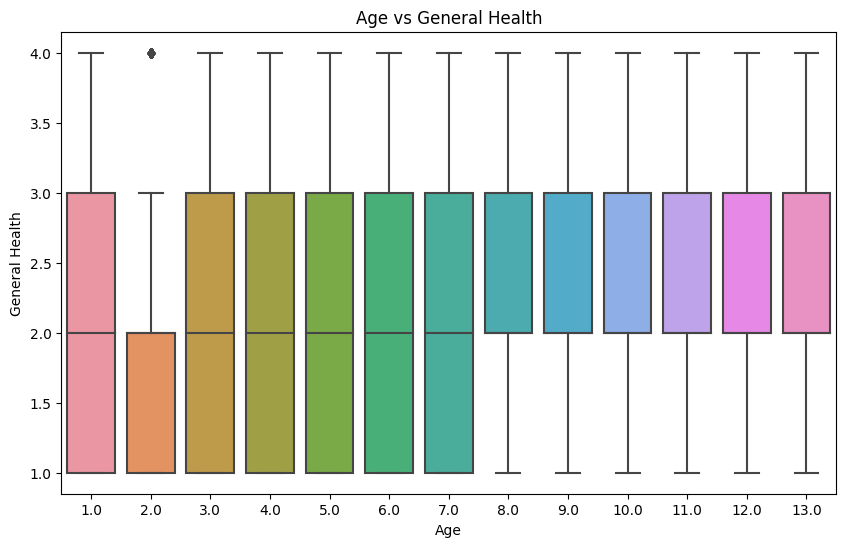

In [15]:
#code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame

# 1. MentHlth vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHlth', y='MentHlth', data=data)
plt.title('General Health vs Mental Health')
plt.xlabel('General Health')
plt.ylabel('Mental Health (Days)')
plt.show()

# 2. PhysHlth vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHlth', y='PhysHlth', data=data)
plt.title('General Health vs Physical Health')
plt.xlabel('General Health')
plt.ylabel('Physical Health (Days)')
plt.show()

# 3. PhysActivity vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='PhysActivity', y='GenHlth', data=data)
plt.title('Physical Activity vs General Health')
plt.xlabel('Physical Activity')
plt.ylabel('General Health')
plt.show()

# 4. Age vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='GenHlth', data=data)
plt.title('Age vs General Health')
plt.xlabel('Age')
plt.ylabel('General Health')
plt.show()


### Observation

### Diabetes Binary vs Contibous Variables

continuous_vars = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'GenHlth', 'Income']

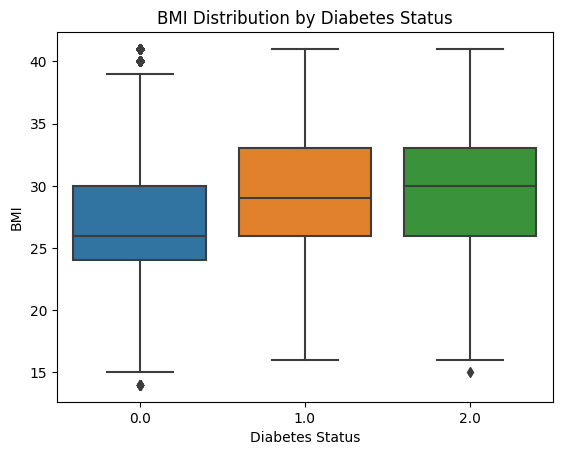

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_3540\1298146857.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Diabetes_binary', y='MentHlth', data=data, ci='sd')


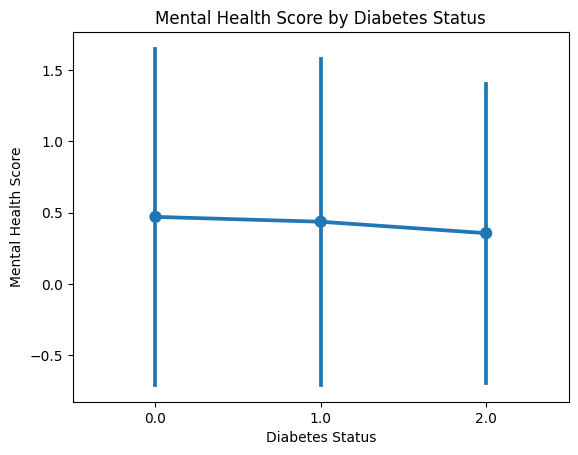

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_3540\1298146857.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Diabetes_binary', y='PhysHlth', data=data, ci='sd')


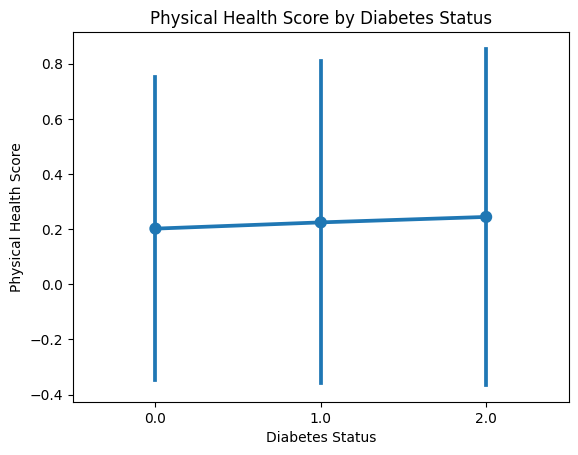

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_3540\1298146857.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Diabetes_binary', y='GenHlth', data=data, ci='sd')


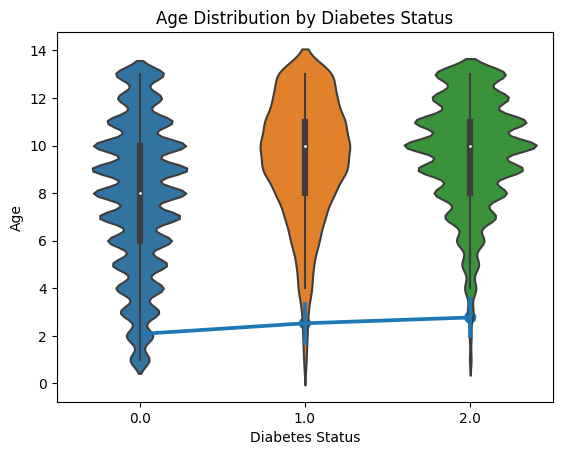

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_3540\1298146857.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Diabetes_binary', y='Income', data=data, ci='sd')


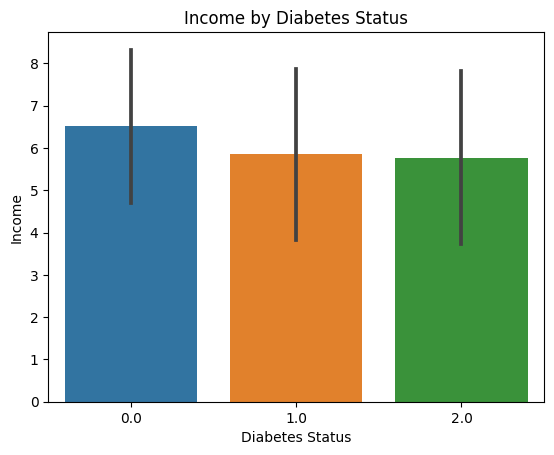

In [16]:
# Example of Box Plot
sns.boxplot(x='Diabetes_binary', y='BMI', data=data)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()

# Example of Point Plot
sns.pointplot(x='Diabetes_binary', y='MentHlth', data=data, ci='sd')
plt.title('Mental Health Score by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Mental Health Score')
plt.show()

# Example of Point Plot
sns.pointplot(x='Diabetes_binary', y='PhysHlth', data=data, ci='sd')
plt.title('Physical Health Score by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Physical Health Score')
plt.show()

# Example of Point Plot
sns.pointplot(x='Diabetes_binary', y='GenHlth', data=data, ci='sd')
plt.title('Grneral Health Score by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('General Health Score')
plt.show

# Example of Violin Plot
sns.violinplot(x='Diabetes_binary', y='Age', data=data)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Age')
plt.show()

# Example of Bar Plot with error bars
sns.barplot(x='Diabetes_binary', y='Income', data=data, ci='sd')
plt.title('Income by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Income')
plt.show()


### Observations